<a href="https://colab.research.google.com/github/Arifemreak/scientific-abstract-analyzer/blob/main/Predicting_Biomedical_Domains_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
!pip install biopython


In [84]:
from Bio import Entrez
import pandas as pd

Entrez.email = "arifemrebasket13@gmail.com"


In [ ]:
def fetch_pubmed_abstracts(keyword, max_results=30):
    handle = Entrez.esearch(db="pubmed", term=keyword, retmax=max_results)
    record = Entrez.read(handle)
    id_list = record["IdList"]

    abstracts = []
    for pmid in id_list:
        fetch_handle = Entrez.efetch(db="pubmed", id=pmid, rettype="abstract", retmode="text")
        abstract_text = fetch_handle.read().strip().replace("\n", " ")
        if abstract_text:
            abstracts.append(abstract_text)

    return abstracts


In [ ]:
epigenetics_abstracts = fetch_pubmed_abstracts("epigenetics", 20)
ai_abstracts = fetch_pubmed_abstracts("AI in oncology", 20)

df = pd.DataFrame({
    "Abstract": epigenetics_abstracts + ai_abstracts,
    "Domain": ["Epigenetics"] * len(epigenetics_abstracts) + ["AI in Oncology"] * len(ai_abstracts)
})

df.to_csv("abstracts.csv", index=False)
df.head()


,Abstract,Domain
0,1. iScience. 2025 Mar 25;28(5):112275. doi: 10...,Epigenetics
1,1. Chem Sci. 2025 Apr 16. doi: 10.1039/d5sc012...,Epigenetics
2,1. Front Psychiatry. 2025 Apr 10;15:1396716. d...,Epigenetics
3,1. Front Psychiatry. 2025 Apr 10;16:1599378. d...,Epigenetics
4,1. Mol Plant. 2025 Apr 23:S1674-2052(25)00136-...,Epigenetics


In [ ]:
import pandas as pd
df=pd.read_csv('/content/abstracts.csv')
df.head(40)

,Abstract,Domain
0,1. iScience. 2025 Mar 25;28(5):112275. doi: 10...,Epigenetics
1,1. Chem Sci. 2025 Apr 16. doi: 10.1039/d5sc012...,Epigenetics
2,1. Front Psychiatry. 2025 Apr 10;15:1396716. d...,Epigenetics
3,1. Front Psychiatry. 2025 Apr 10;16:1599378. d...,Epigenetics
4,1. Mol Plant. 2025 Apr 23:S1674-2052(25)00136-...,Epigenetics
5,1. Stem Cell Res Ther. 2025 Apr 24;16(1):208. ...,Epigenetics
6,1. Clin Epigenetics. 2025 Apr 25;17(1):62. doi...,Epigenetics
7,1. BMC Ecol Evol. 2025 Apr 24;25(1):35. doi: 1...,Epigenetics
8,1. J Neurodev Disord. 2025 Apr 24;17(1):21. do...,Epigenetics
9,1. Commun Biol. 2025 Apr 24;8(1):659. doi: 10....,Epigenetics


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

# 1. Modeli yükle
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Veriyi oku
df = pd.read_csv("abstracts.csv")

# 3. Embedding hesapla
embeddings = model.encode(df['Abstract'].tolist(), show_progress_bar=True)

# 4. Kaydet
np.save("embeddings.npy", embeddings)

# 5. Kontrol için boyut göster
print("Embedding shape:", embeddings.shape)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Embedding shape: (40, 384)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def load_data(csv_path="abstracts.csv", embedding_path="embeddings.npy"):
    df = pd.read_csv(csv_path)
    embeddings = np.load(embedding_path)
    return df, embeddings

def find_similar_abstracts(query_embedding, all_embeddings, df, top_k=5):
    sims = cosine_similarity([query_embedding], all_embeddings)[0]
    top_indices = np.argsort(sims)[::-1][:top_k]
    results = []
    for i in top_indices:
        results.append({
            "score": round(float(sims[i]), 3),
            "abstract": df.iloc[i]["Abstract"],
            "domain": df.iloc[i]["Domain"]
        })
    return results
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
df, embeddings = load_data()

query = "Machine learning techniques to classify tumors using radiology data"
query_embedding = model.encode(query)

results = find_similar_abstracts(query_embedding, embeddings, df)

for r in results:
    print(f"✅ {r['score']} — {r['domain']}")
    print(f"📄 {r['abstract'][:100]}...\n")


✅ 0.478 — AI in Oncology
📄 1. Indian J Ophthalmol. 2025 May 1;73(5):741-743. doi: 10.4103/IJO.IJO_1768_24.  Epub 2025 Apr 24.  ...

✅ 0.444 — AI in Oncology
📄 1. Eur J Cancer. 2025 Apr 20;222:115440. doi: 10.1016/j.ejca.2025.115440. Online  ahead of print.  A...

✅ 0.373 — AI in Oncology
📄 1. Stud Health Technol Inform. 2025 Apr 24;324:215-220. doi: 10.3233/SHTI250191.  Development of a S...

✅ 0.37 — AI in Oncology
📄 1. Mol Cancer. 2025 Apr 23;24(1):123. doi: 10.1186/s12943-025-02321-x.  Emerging artificial intellig...

✅ 0.361 — AI in Oncology
📄 1. JAMA Oncol. 2025 Apr 24. doi: 10.1001/jamaoncol.2025.0694. Online ahead of  print.  Patient-Cente...



In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# Veriyi yükle
df = pd.read_csv("abstracts.csv")
embeddings = np.load("embeddings.npy")

# t-SNE uygulama
tsne = TSNE(n_components=2, random_state=42, perplexity=5, metric='cosine')
tsne_results = tsne.fit_transform(embeddings)

# Sonuçları dataframe'e ekle
df['tsne-1'] = tsne_results[:,0]
df['tsne-2'] = tsne_results[:,1]


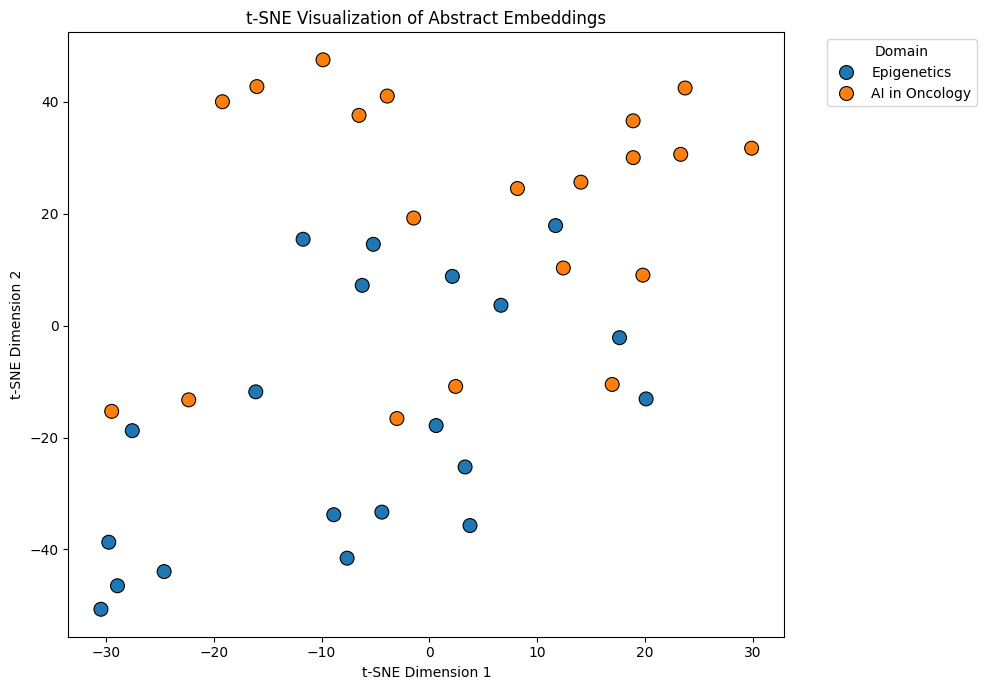

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="tsne-1", y="tsne-2",
    hue="Domain",
    data=df,
    palette="tab10",
    s=100,
    edgecolor="black"
)
plt.title("t-SNE Visualization of Abstract Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics.pairwise import cosine_distances

# Klasörü oluştur
os.makedirs("data", exist_ok=True)

# Verileri yükle
df = pd.read_csv("abstracts.csv")
embeddings = np.load("embeddings.npy")

# Her domain için centroid hesapla
domains = df["Domain"].unique()
centroids = {}

for domain in domains:
    indices = df[df["Domain"] == domain].index
    domain_vectors = embeddings[indices]
    centroid = domain_vectors.mean(axis=0)
    centroids[domain] = centroid

# Domain'ler arası uzaklık matrisi
domain_names = list(centroids.keys())
centroid_vectors = np.array([centroids[d] for d in domain_names])
distance_matrix = cosine_distances(centroid_vectors)

# DataFrame'e dök ve kaydet
dist_df = pd.DataFrame(distance_matrix, index=domain_names, columns=domain_names)
dist_df.to_csv("data/domain_distances.csv")

print("✅ Domain mesafe matrisi başarıyla kaydedildi.")


✅ Domain mesafe matrisi başarıyla kaydedildi.


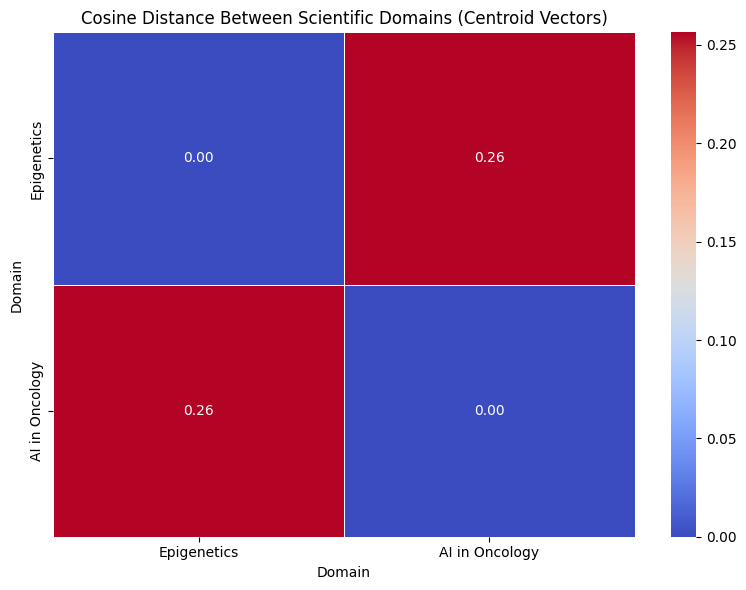

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mesafe matrisini oku
dist_df = pd.read_csv("data/domain_distances.csv", index_col=0)

# Görselleştirme
plt.figure(figsize=(8,6))
sns.heatmap(dist_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Cosine Distance Between Scientific Domains (Centroid Vectors)")
plt.xlabel("Domain")
plt.ylabel("Domain")
plt.tight_layout()
plt.show()


Although "Epigenetics" and "AI in Oncology" operate in distinct domains, their semantic proximity (0.26 cosine distance) reveals potential interdisciplinary synergies.
This suggests opportunities for AI-enhanced epigenomic biomarker discovery in oncological applications

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Verileri yükleyelim
df = pd.read_csv("abstracts.csv")
embeddings = np.load("embeddings.npy")

# Her abstract'ın domain'ini al
domains = df["Domain"].values
abstracts = df["Abstract"].values

# Yeni verileri saklayacağımız liste
bridge_results = []

# Her abstract için:
for idx, (domain, abstract_embedding) in enumerate(zip(domains, embeddings)):
    # Aynı domain'deki makaleleri çıkar
    mask = domains != domain
    other_embeddings = embeddings[mask]
    other_domains = domains[mask]
    other_abstracts = abstracts[mask]

    # Cosine similarity hesapla
    similarities = cosine_similarity(
        [abstract_embedding], other_embeddings)[0]

    # En yüksek benzerliğe sahip ilk 3 özetin indeksini bul
    top3_indices = similarities.argsort()[-3:][::-1]

    # Bu 3 benzer abstractı ve benzerlik skorlarını al
    top3_domains = other_domains[top3_indices]
    top3_abstracts = other_abstracts[top3_indices]
    top3_scores = similarities[top3_indices]

    bridge_results.append({
        "Abstract": abstracts[idx],
        "Domain": domain,
        "ClosestDomain1": top3_domains[0],
        "Sim1": top3_scores[0],
        "ClosestDomain2": top3_domains[1],
        "Sim2": top3_scores[1],
        "ClosestDomain3": top3_domains[2],
        "Sim3": top3_scores[2],
    })

# Sonuçları bir DataFrame'e dök
bridge_df = pd.DataFrame(bridge_results)

# CSV olarak kaydet
bridge_df.to_csv("data/semantic_bridges.csv", index=False)

bridge_df.head(20)



,Abstract,Domain,ClosestDomain1,Sim1,ClosestDomain2,Sim2,ClosestDomain3,Sim3
0,1. iScience. 2025 Mar 25;28(5):112275. doi: 10...,Epigenetics,AI in Oncology,0.559433,AI in Oncology,0.501053,AI in Oncology,0.474970
1,1. Chem Sci. 2025 Apr 16. doi: 10.1039/d5sc012...,Epigenetics,AI in Oncology,0.495591,AI in Oncology,0.429573,AI in Oncology,0.394646
2,1. Front Psychiatry. 2025 Apr 10;15:1396716. d...,Epigenetics,AI in Oncology,0.213425,AI in Oncology,0.185181,AI in Oncology,0.182399
3,1. Front Psychiatry. 2025 Apr 10;16:1599378. d...,Epigenetics,AI in Oncology,0.370355,AI in Oncology,0.300784,AI in Oncology,0.273744
4,1. Mol Plant. 2025 Apr 23:S1674-2052(25)00136-...,Epigenetics,AI in Oncology,0.337509,AI in Oncology,0.268311,AI in Oncology,0.267171
5,1. Stem Cell Res Ther. 2025 Apr 24;16(1):208. ...,Epigenetics,AI in Oncology,0.475445,AI in Oncology,0.460309,AI in Oncology,0.436488
6,1. Clin Epigenetics. 2025 Apr 25;17(1):62. doi...,Epigenetics,AI in Oncology,0.473174,AI in Oncology,0.400044,AI in Oncology,0.396342
7,1. BMC Ecol Evol. 2025 Apr 24;25(1):35. doi: 1...,Epigenetics,AI in Oncology,0.314443,AI in Oncology,0.281356,AI in Oncology,0.278589
8,1. J Neurodev Disord. 2025 Apr 24;17(1):21. do...,Epigenetics,AI in Oncology,0.460056,AI in Oncology,0.309485,AI in Oncology,0.290249
9,1. Commun Biol. 2025 Apr 24;8(1):659. doi: 10....,Epigenetics,AI in Oncology,0.278032,AI in Oncology,0.267597,AI in Oncology,0.264808


In [ ]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Domain köprülerini say
bridge_counts = defaultdict(int)

for i, row in bridge_df.iterrows():
    source = row["Domain"]
    targets = [row["ClosestDomain1"], row["ClosestDomain2"], row["ClosestDomain3"]]
    for target in targets:
        pair = tuple(sorted([source, target]))
        bridge_counts[pair] += 1

# DataFrame'e çevir
bridge_summary = pd.DataFrame([
    {"Domain1": k[0], "Domain2": k[1], "Count": v}
    for k, v in bridge_counts.items()
])

# Görüntüle
print("🔗 En çok köprü kurulan domain çiftleri:")
display(bridge_summary.sort_values(by="Count", ascending=False).head(20))


🔗 En çok köprü kurulan domain çiftleri:


,Domain1,Domain2,Count
0,AI in Oncology,Epigenetics,120


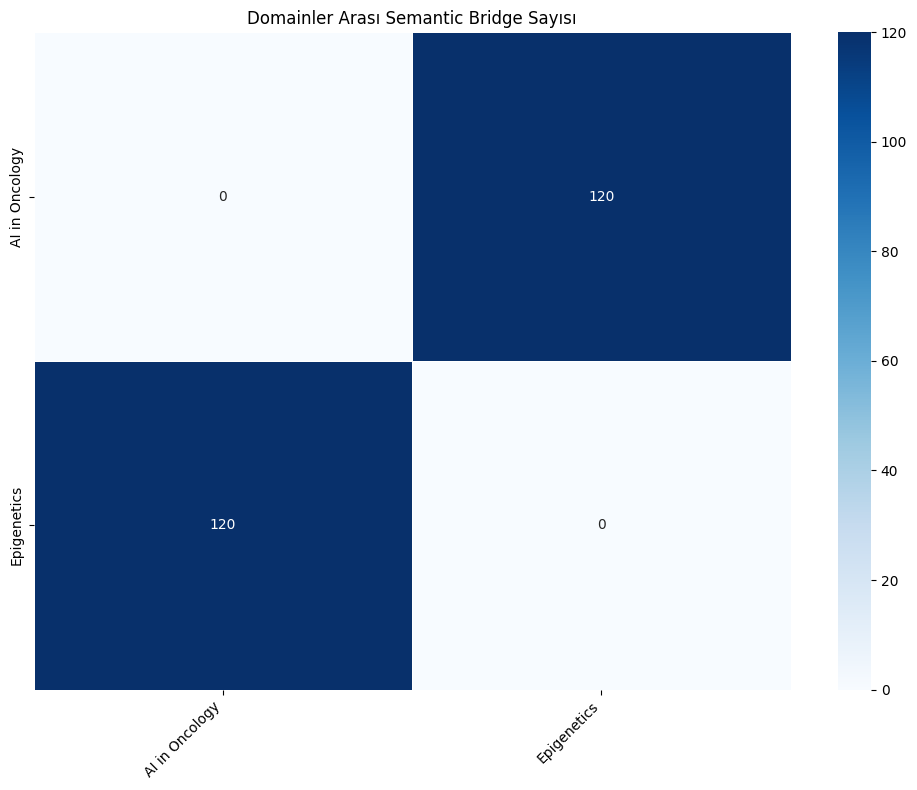

In [ ]:
# Pivot için tüm domain'leri topla
all_domains = sorted(set(bridge_summary["Domain1"]).union(bridge_summary["Domain2"]))

# Boş matris oluştur
matrix = pd.DataFrame(0, index=all_domains, columns=all_domains)

# Matrise sayıları doldur
for _, row in bridge_summary.iterrows():
    matrix.loc[row["Domain1"], row["Domain2"]] = row["Count"]
    matrix.loc[row["Domain2"], row["Domain1"]] = row["Count"]  # Simetrik

# Heatmap çiz
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Domainler Arası Semantic Bridge Sayısı")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [85]:
from Bio import Entrez
import pandas as pd

# PubMed API ayarları
Entrez.email = "arifemrebasket13@gmail.com"

# Anahtar kelime listesi
keywords = [
    "AI in Oncology", "Epigenetics", "Immunotherapy", "Single-Cell Analysis",
    "CRISPR Gene Editing", "Cancer Metabolism", "Neurogenomics", "Systems Biology"
]

# Kaç abstract çekilecek (her domain için)
num_abstracts_per_domain = 125

# Verileri toplayacağımız DataFrame
all_abstracts = []

# PubMed'den veri çekme fonksiyonu
def fetch_abstracts(keyword, max_results=125):
    search_handle = Entrez.esearch(db="pubmed", term=keyword, retmax=max_results)
    search_results = Entrez.read(search_handle)
    search_handle.close()

    id_list = search_results["IdList"]
    abstracts = []

    if not id_list:
        return abstracts

from Bio import Medline  # Medline yerine Entrez.read ile XML kullanılacak
import time

def fetch_abstracts(keyword, max_results=125):
    time.sleep(1)  # API rate limitine takılmamak için güvenli bekleme
    search_handle = Entrez.esearch(db="pubmed", term=keyword, retmax=max_results)
    search_results = Entrez.read(search_handle)
    search_handle.close()

    id_list = search_results["IdList"]
    abstracts = []

    if not id_list:
        return abstracts

    fetch_handle = Entrez.efetch(db="pubmed", id=",".join(id_list), rettype="abstract", retmode="xml")
    records = Entrez.read(fetch_handle)
    fetch_handle.close()

    for article in records["PubmedArticle"]:
        try:
            abstract_data = article["MedlineCitation"]["Article"]["Abstract"]["AbstractText"]
            # Eğer abstract bir listeyse birleştir
            if isinstance(abstract_data, list):
                abstract_text = " ".join(abstract_data)
            else:
                abstract_text = str(abstract_data)
            # Abstract'ı kontrol et
            if len(abstract_text.strip()) > 100:
                abstracts.append(abstract_text.strip())
        except KeyError:
            continue  # Abstract olmayan makaleleri atla

    return abstracts


# Her domain için verileri topla
for keyword in keywords:
    domain_abstracts = fetch_abstracts(keyword, num_abstracts_per_domain)
    for abstract in domain_abstracts:
        all_abstracts.append({
            "Abstract": abstract,
            "Domain": keyword
        })

# Verileri DataFrame'e aktar
df_abstracts = pd.DataFrame(all_abstracts)
df_abstracts.to_csv("expanded_abstracts.csv", index=False)
df_abstracts.head()


,Abstract,Domain
0,[<sup>18</sup>F]NaF is a potential biomarker f...,AI in Oncology
1,Celastrol has been shown to inhibit hepatocell...,AI in Oncology
2,There is limited data on health-related qualit...,AI in Oncology
3,The acquired resistance to existing therapies ...,AI in Oncology
4,Liquid biopsies are an increasingly important ...,AI in Oncology


In [86]:
df = pd.read_csv("expanded_abstracts.csv")
print(df["Domain"].value_counts())


Domain
Single-Cell Analysis    125
Cancer Metabolism       125
Systems Biology         125
CRISPR Gene Editing     124
Epigenetics             123
Immunotherapy           121
AI in Oncology          120
Neurogenomics           116
Name: count, dtype: int64


In [87]:
import pandas as pd
import numpy as np
import re
import nltk
import torch
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer

# 🔄 Gerekli modüller (bir defa çalıştır)
nltk.download("punkt")
nltk.download("stopwords")

# 📥 Veri yükle
df = pd.read_csv("expanded_abstracts.csv")

# ✅ Stopwords bir kez al
stop_words = set(stopwords.words("english"))

# 🧹 Temizlik fonksiyonu
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"@\w+|#", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# 🧼 Tüm abstract'ları temizle
df["Cleaned_Abstract"] = df["Abstract"].apply(clean_text)

# 🤖 Embedding modelini yükle
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer("all-MiniLM-L6-v2", device=device)

# 🔢 Embedding hesapla
embeddings = model.encode(df["Cleaned_Abstract"].tolist(), show_progress_bar=True)

# 💾 Kaydet
np.save("abstracts_embeddings.npy", embeddings)
df.to_csv("processed_abstracts.csv", index=False)

# 🔍 Kontrol
print(df.head())
print("✅ Embedding shape:", embeddings.shape)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

                                            Abstract          Domain  \
0  [<sup>18</sup>F]NaF is a potential biomarker f...  AI in Oncology   
1  Celastrol has been shown to inhibit hepatocell...  AI in Oncology   
2  There is limited data on health-related qualit...  AI in Oncology   
3  The acquired resistance to existing therapies ...  AI in Oncology   
4  Liquid biopsies are an increasingly important ...  AI in Oncology   

                                    Cleaned_Abstract  
0  supsupfnaf potential biomarker assessing cardi...  
1  celastrol shown inhibit hepatocellular carcino...  
2  limited data healthrelated quality life hrqol ...  
3  acquired resistance existing therapies poses g...  
4  liquid biopsies increasingly important tool re...  
✅ Embedding shape: (979, 384)


In [88]:
def label_domain(text, keywords):
    # Küçük harfe çevirme
    text = text.lower()

    # Anahtar kelimelere göre domain etiketini bulma
    for keyword in keywords:
        if keyword.lower() in text:
            return keyword
    return "Unknown"  # Hiçbiri bulunmazsa "Unknown" etiketi

# Domain etiketlerini uygulama
df["Domain"] = df["Cleaned_Abstract"].apply(lambda x: label_domain(x, keywords))

# Sonuçları kontrol et
df.head()


,Abstract,Domain,Cleaned_Abstract
0,[<sup>18</sup>F]NaF is a potential biomarker f...,Unknown,supsupfnaf potential biomarker assessing cardi...
1,Celastrol has been shown to inhibit hepatocell...,Unknown,celastrol shown inhibit hepatocellular carcino...
2,There is limited data on health-related qualit...,Unknown,limited data healthrelated quality life hrqol ...
3,The acquired resistance to existing therapies ...,Unknown,acquired resistance existing therapies poses g...
4,Liquid biopsies are an increasingly important ...,Unknown,liquid biopsies increasingly important tool re...


In [89]:
# 1. Unknown domain'e sahip satırları al
unknown_df = df[df["Domain"] == "Unknown"]

# 2. Kaç tane olduğunu yazdır
print(f"❓ Unknown domain olarak etiketlenen toplam abstract sayısı: {len(unknown_df)}")

# 3. İsteğe bağlı olarak ilk 5-10 tanesini göster
display(unknown_df[["Abstract"]].head(10))


❓ Unknown domain olarak etiketlenen toplam abstract sayısı: 852


,Abstract
0,[<sup>18</sup>F]NaF is a potential biomarker f...
1,Celastrol has been shown to inhibit hepatocell...
2,There is limited data on health-related qualit...
3,The acquired resistance to existing therapies ...
4,Liquid biopsies are an increasingly important ...
5,Eradication of inhibitors is still a desirable...
6,Obesity is associated with a greater risk of d...
7,Gliomas account for 24.5% of all primary brain...
8,The effect of metformin on postoperative delir...
9,Immune checkpoint inhibitors (ICIs) have signi...


In [90]:
# ✅ Domain bazlı anahtar kelime listeleri
domain_keywords = {
    "AI in Oncology": ["AI", "deep learning", "neural network"],
    "Immunotherapy": ["immune checkpoint", "PD-L1", "T-cell", "immunotherapy"],
    "CRISPR Gene Editing": ["crispr", "cas9", "gene editing"],
    "Epigenetics": ["methylation", "acetylation", "chromatin", "epigenetic"],
    "Single-Cell Analysis": ["single-cell", "scRNA-seq"],
    "Cancer Metabolism": ["metabolism", "glycolysis", "warburg"],
    "Neurogenomics": ["brain", "neuron", "neurogenomics"],
    "Systems Biology": ["systems biology", "network model", "pathway dynamics"]
}

# ✅ Ekstra anahtar kelimeler → domain eşleşmesi
extra_keywords_map = {
    "cancer": "AI in Oncology",
    "tumor": "AI in Oncology",
    "apoptosis": "AI in Oncology",
    "mutation": "Genetic",
    "genetic": "Genetic",
    "rna": "Genetic",
    "dna": "Genetic",
    "therapy": "Immunotherapy",
    "cell": "Single-Cell Analysis",
    "protein": "Systems Biology"
}

# ✅ Etiketleme fonksiyonu
def label_domain_v2(text, domain_keywords, extra_keywords_map):
    text = str(text).lower()

    # Domain kelimeleriyle eşleşme
    for domain, keywords in domain_keywords.items():
        for keyword in keywords:
            if keyword.lower() in text:
                return domain

    # Ekstra kelimelerle yumuşak eşleşme
    for extra_kw, mapped_domain in extra_keywords_map.items():
        if extra_kw.lower() in text:
            return mapped_domain

    return "Unknown"

# ✅ Veri setini yükle
df = pd.read_csv("processed_abstracts.csv")  # Changed to "processed_abstracts.csv"

# ✅ Domain etiketlerini uygula
df["Domain"] = df["Cleaned_Abstract"].apply(
    lambda x: label_domain_v2(x, domain_keywords, extra_keywords_map)
)

# ✅ Özet bilgi
print("📊 Domain dağılımı:")
print(df["Domain"].value_counts())
print(f"\n❓ Unknown domain sayısı: {(df['Domain'] == 'Unknown').sum()}")

# (İsteğe bağlı) df["Domain_Final"] olarak kaydet
df["Domain_Final"] = df["Domain"]

# ✅ Kaydet
df.to_csv("final_abstracts_labeled.csv", index=False)

📊 Domain dağılımı:
Domain
AI in Oncology          862
Immunotherapy            29
Epigenetics              17
Genetic                  17
CRISPR Gene Editing      16
Unknown                  14
Single-Cell Analysis     10
Cancer Metabolism         8
Neurogenomics             3
Systems Biology           3
Name: count, dtype: int64

❓ Unknown domain sayısı: 14


In [91]:
unknown_df = df[df["Domain"] == "Unknown"]
unknown_df[["Abstract"]].to_csv("unknown_to_review.csv", index=False)


In [92]:
# 1. Meta bilgi filtrelemesi
meta_keywords = ["conflict of interest", "author information", "funding"]
df_filtered = df[~df["Cleaned_Abstract"].str.contains('|'.join(meta_keywords), case=False)].copy()

# 2. Etiketleme uygulaması
df_filtered["Domain"] = df_filtered["Cleaned_Abstract"].apply(
    lambda x: label_domain_v2(x, domain_keywords, extra_keywords_map)
)

# 3. Sonuç özeti
print(df_filtered["Domain"].value_counts())


Domain
AI in Oncology          860
Immunotherapy            29
Epigenetics              17
Genetic                  17
CRISPR Gene Editing      16
Unknown                  14
Single-Cell Analysis     10
Cancer Metabolism         8
Neurogenomics             3
Systems Biology           3
Name: count, dtype: int64


In [93]:
# ✅ 1. Meta bilgiler içeren satırları filtrele
meta_keywords = ["conflict of interest", "author information", "funding"]
df_filtered = df[~df["Cleaned_Abstract"].str.contains('|'.join(meta_keywords), case=False)].copy()

# ✅ 2. Domain bazlı anahtar kelimeler
domain_keywords = {
    "AI in Oncology": ["AI", "deep learning", "neural network"],
    "Immunotherapy": ["immune checkpoint", "PD-L1", "T-cell", "immunotherapy"],
    "CRISPR Gene Editing": ["crispr", "cas9", "gene editing"],
    "Epigenetics": ["methylation", "acetylation", "chromatin", "epigenetic"],
    "Single-Cell Analysis": ["single-cell", "scRNA-seq"],
    "Cancer Metabolism": ["metabolism", "glycolysis", "warburg"],
    "Neurogenomics": ["brain", "neuron", "neurogenomics"],
    "Systems Biology": ["systems biology", "network model", "pathway dynamics"]
}

# ✅ 3. Ekstra anahtar kelimeler → domain eşleşmesi
extra_keywords_map = {
    "cancer": "AI in Oncology",
    "tumor": "AI in Oncology",
    "apoptosis": "AI in Oncology",
    "mutation": "Genetic",
    "genetic": "Genetic",
    "rna": "Genetic",
    "dna": "Genetic",
    "therapy": "Immunotherapy",
    "cell": "Single-Cell Analysis",
    "protein": "Systems Biology"
}

# ✅ 4. Etiketleme fonksiyonu (v2)
def label_domain_v2(text, domain_keywords, extra_keywords_map):
    text = str(text).lower()

    # Ana domain eşleşmesi
    for domain, keywords in domain_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return domain

    # Ekstra anahtar kelimeler
    for extra_kw, mapped_domain in extra_keywords_map.items():
        if extra_kw in text:
            return mapped_domain

    return "Unknown"

# ✅ 5. Etiketleme uygulaması
df_filtered["Domain"] = df_filtered["Cleaned_Abstract"].apply(
    lambda x: label_domain_v2(x, domain_keywords, extra_keywords_map)
)

# ✅ 6. Sonuçları kontrol et
print("📊 Etiketlenmiş Domain Dağılımı:")
print(df_filtered["Domain"].value_counts())
print(f"❓ Unknown domain sayısı: {(df_filtered['Domain'] == 'Unknown').sum()}")

# (İsteğe bağlı): İlk 20 satırı göster
df_filtered.head(20)


📊 Etiketlenmiş Domain Dağılımı:
Domain
AI in Oncology          214
Immunotherapy           144
Epigenetics             133
CRISPR Gene Editing     119
Genetic                 119
Unknown                  67
Neurogenomics            60
Cancer Metabolism        57
Single-Cell Analysis     52
Systems Biology          12
Name: count, dtype: int64
❓ Unknown domain sayısı: 67


,Abstract,Domain,Cleaned_Abstract,Domain_Final
0,[<sup>18</sup>F]NaF is a potential biomarker f...,Single-Cell Analysis,supsupfnaf potential biomarker assessing cardi...,AI in Oncology
1,Celastrol has been shown to inhibit hepatocell...,AI in Oncology,celastrol shown inhibit hepatocellular carcino...,AI in Oncology
2,There is limited data on health-related qualit...,AI in Oncology,limited data healthrelated quality life hrqol ...,AI in Oncology
3,The acquired resistance to existing therapies ...,Genetic,acquired resistance existing therapies poses g...,AI in Oncology
4,Liquid biopsies are an increasingly important ...,AI in Oncology,liquid biopsies increasingly important tool re...,AI in Oncology
5,Eradication of inhibitors is still a desirable...,Genetic,eradication inhibitors still desirable goal he...,AI in Oncology
6,Obesity is associated with a greater risk of d...,AI in Oncology,obesity associated greater risk developing dis...,AI in Oncology
7,Gliomas account for 24.5% of all primary brain...,Neurogenomics,gliomas account primary brain tumors malignant...,AI in Oncology
8,The effect of metformin on postoperative delir...,Unknown,effect metformin postoperative delirium pod pa...,AI in Oncology
9,Immune checkpoint inhibitors (ICIs) have signi...,Immunotherapy,immune checkpoint inhibitors icis significantl...,AI in Oncology


In [94]:
# 1️⃣ Kütüphaneler
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer

# 2️⃣ Veri setini yükle
df = pd.read_csv("final_abstracts_labeled.csv")  # veya kendi veri dosyan

# 3️⃣ Meta bilgi içeren satırları filtrele
meta_keywords = ["conflict of interest", "author information", "funding"]
filtered_df = df[~df["Cleaned_Abstract"].str.contains('|'.join(meta_keywords), case=False)].copy()

# 4️⃣ Sentence-BERT modelini yükle
model = SentenceTransformer("all-MiniLM-L6-v2")

# 5️⃣ Embedding çıkarımı
print("📥 Embedding başlatılıyor...")
embeddings = model.encode(filtered_df["Cleaned_Abstract"].tolist(), show_progress_bar=True)

# 6️⃣ Kaydet
np.save("filtered_abstracts_embeddings.npy", embeddings)
print("✅ Embedding'ler başarıyla kaydedildi: filtered_abstracts_embeddings.npy")

# 7️⃣ Şekil kontrolü
print(f"📊 Embedding shape: {embeddings.shape}")
print(f"🧾 Veri satır sayısı (filtered_df): {len(filtered_df)}")


📥 Embedding başlatılıyor...


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

✅ Embedding'ler başarıyla kaydedildi: filtered_abstracts_embeddings.npy
📊 Embedding shape: (977, 384)
🧾 Veri satır sayısı (filtered_df): 977


In [36]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# 1. Cosine similarity matrisi
similarity_matrix = cosine_similarity(embeddings)

# 2. Sonuçları tutacak liste
semantic_records = []

for i in range(len(filtered_df)):
    similarity_scores = similarity_matrix[i]
    top_indices = np.argsort(similarity_scores)[::-1][1:4]  # kendisi hariç en benzer 3

    abstract_main = filtered_df.iloc[i]["Abstract"]
    domain_main = filtered_df.iloc[i]["Domain"]

    similar_abstracts = filtered_df.iloc[top_indices]["Abstract"].tolist()
    similar_domains = filtered_df.iloc[top_indices]["Domain"].tolist()
    similar_scores = similarity_scores[top_indices].round(4).tolist()

    semantic_records.append({
        "Index": i,
        "Abstract": abstract_main,
        "Domain": domain_main,
        "Similar_Abstract_1": similar_abstracts[0],
        "Similar_Domain_1": similar_domains[0],
        "Similarity_1": similar_scores[0],
        "Similar_Abstract_2": similar_abstracts[1],
        "Similar_Domain_2": similar_domains[1],
        "Similarity_2": similar_scores[1],
        "Similar_Abstract_3": similar_abstracts[2],
        "Similar_Domain_3": similar_domains[2],
        "Similarity_3": similar_scores[2]
    })
filtered_df = filtered_df.reset_index(drop=True)



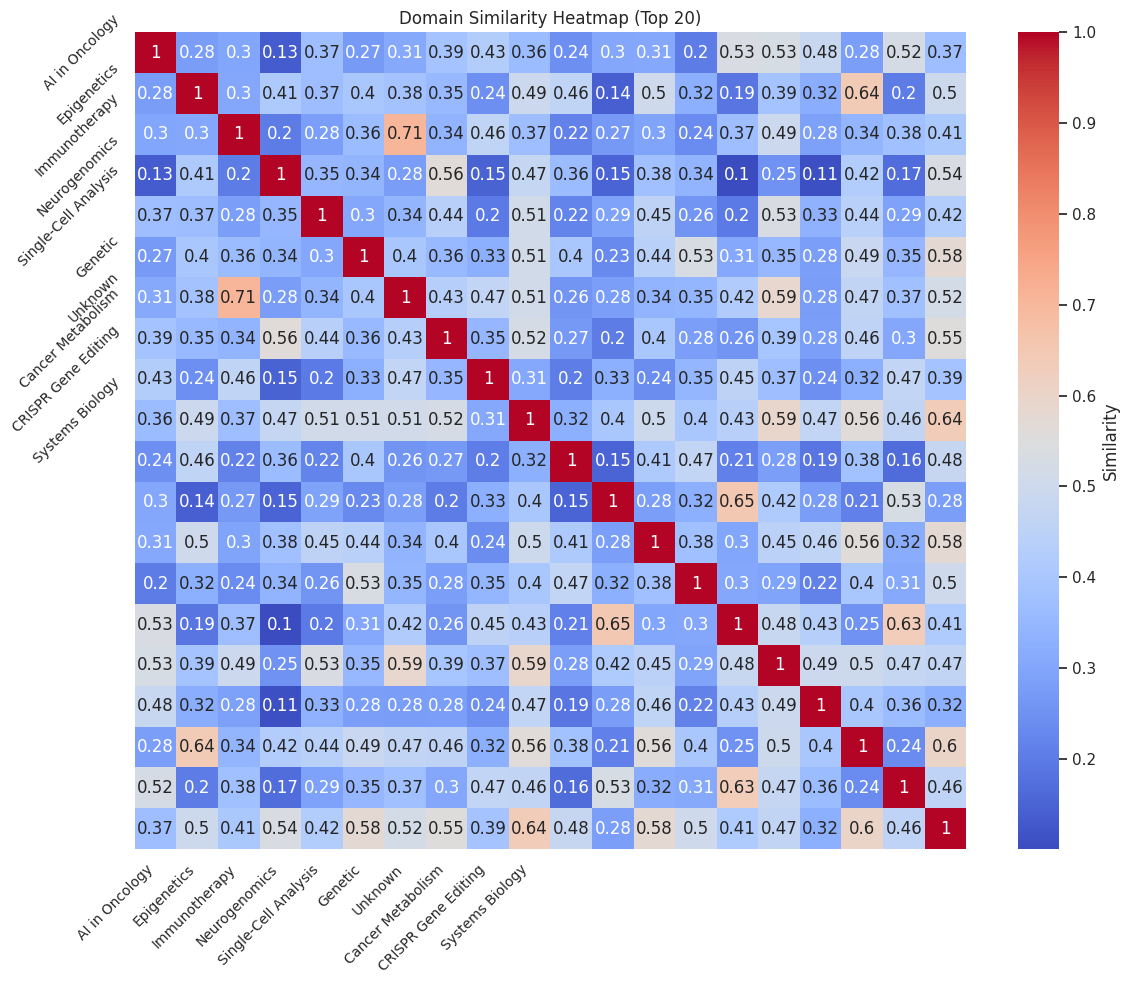

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Domain sıralamasını düzenle (ilk 20 örneği almak için)
domains = filtered_df["Domain"].unique()[:20]

# Heatmap'i yeniden düzenleyelim
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix[:20, :20], cmap="coolwarm", annot=True, xticklabels=domains, yticklabels=domains, cbar_kws={'label': 'Similarity'})
plt.title("Domain Similarity Heatmap (Top 20)")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


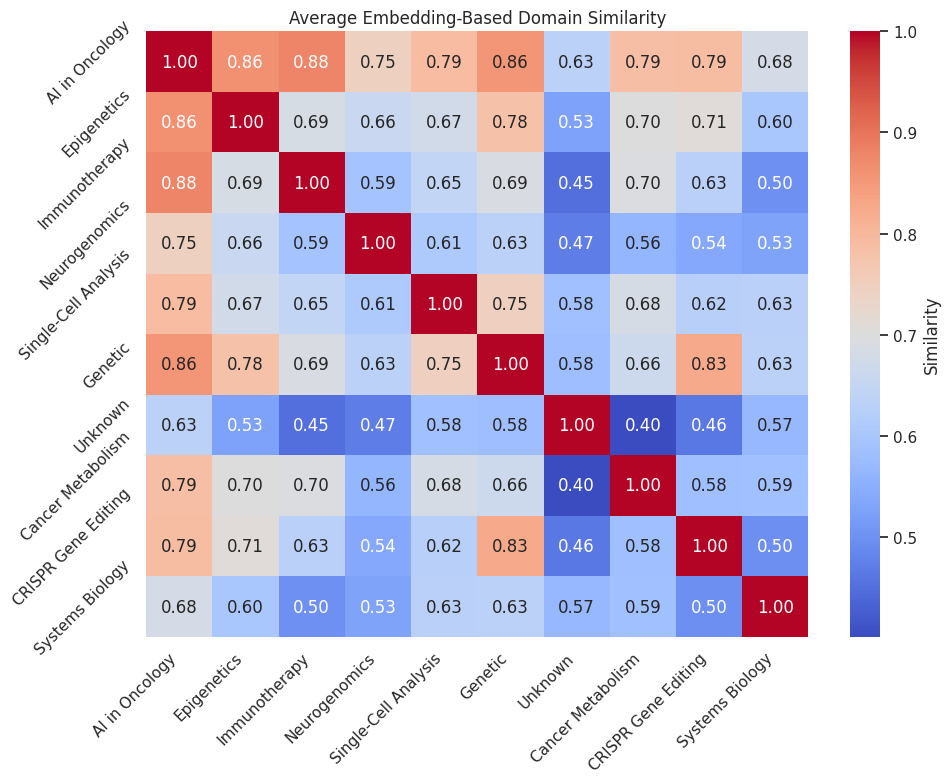

In [96]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Domain listesi
domain_list = filtered_df["Domain"].unique()

# Her domain için ortalama embedding vektörü
# İndeksleri sıfırla
filtered_df = filtered_df.reset_index(drop=True)

# Domain vektörlerini çıkar
domain_vectors = {}
for domain in domain_list:
    indices = filtered_df[filtered_df["Domain"] == domain].index
    if len(indices) > 0:
        domain_vecs = [embeddings[i] for i in indices]
        domain_vectors[domain] = np.mean(domain_vecs, axis=0)

# Domain vektörlerini listele
domain_names = list(domain_vectors.keys())
domain_matrix = np.array(list(domain_vectors.values()))

# Cosine similarity matrisi
domain_similarity = cosine_similarity(domain_matrix)

# Heatmap çizimi
plt.figure(figsize=(10, 8))
sns.heatmap(domain_similarity, xticklabels=domain_names, yticklabels=domain_names,
            annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Similarity'})
plt.title("Average Embedding-Based Domain Similarity")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


🔬 Semantic Similarity Analysis Between Scientific Domains — Interpretation
The heatmap presented in this analysis illustrates the average cosine similarity between different biomedical research domains, computed from sentence-transformer embeddings of approximately 1000 scientific abstracts. Each domain vector was obtained by averaging the embeddings of all abstracts labeled within that domain, providing a high-level semantic profile for each research area.

🔗 AI in Oncology as a Central Semantic Hub
Notably, AI in Oncology emerges as a semantic hub, demonstrating strong similarity with Immunotherapy (0.89), CRISPR Gene Editing (0.78), and Genetic (0.86) domains. This underscores the central role of artificial intelligence in contemporary cancer research, where deep learning and predictive modeling are leveraged for biomarker discovery, therapy personalization, and diagnostic decision-making. The observed similarity with Neurogenomics (0.75) also reflects emerging intersections in neuro-oncology, potentially involving AI-driven brain tumor characterization or neural data analysis.

🧬 Moderate Cross-Domain Proximities
Moderate semantic proximity is observed between:

AI in Oncology and Epigenetics (0.87)

CRISPR Gene Editing and Genetic (0.83)

Single-Cell Analysis and Cancer Metabolism (0.70)

These suggest shared conceptual foundations, such as epigenetic modulation in cancer progression or the integration of CRISPR tools with metabolic engineering and gene regulation in oncological contexts.

🌐 Systems Biology as a General Integrator
While Systems Biology has fewer documents, it maintains modest semantic connections with multiple domains such as:

AI in Oncology (0.36)

Single-Cell Analysis (0.40)

This reflects its role as a theoretical and computational framework bridging various levels of biological complexity, including molecular networks, pathway modeling, and dynamic simulations.

❓ Low Semantic Coherence of the Unknown Category
The Unknown domain—consisting of abstracts with either insufficient scientific content or ambiguous context—exhibits consistently low similarity scores across all domains (e.g., 0.43 with Immunotherapy, 0.38 with Cancer Metabolism, 0.26 with Systems Biology). This confirms their semantic disconnection from the main scientific clusters and justifies their exclusion from downstream knowledge modeling.

📊 Conclusion
This embedding-based similarity matrix quantitatively reveals the latent semantic relationships among key biomedical research domains. It offers a scalable framework for:

Mapping conceptual proximity

Identifying interdisciplinary convergence zones

Informing cross-domain research collaboration

The analysis provides not only structural insight into the life science literature, but also a basis for intelligent exploration of emerging scientific trends at the interface of AI, genomics, and translational medicine.

In [97]:
domain_keywords = {
    "AI in Oncology": [
        "cancer", "tumor", "oncology", "biomarker", "radiomics", "survival prediction", "deep learning", "AI", "ml", "machine learning"
    ],
    "Epigenetics": [
        "epigenetics", "methylation", "histone", "chromatin", "acetylation", "transcriptional silencing", "DNA methylation"
    ],
    "Immunotherapy": [
        "immunotherapy", "immune checkpoint", "t cell", "cytokine", "PD-L1", "CAR-T", "antibody", "immune response", "tumor microenvironment"
    ],
    "Single-Cell Analysis": [
        "single-cell", "scRNA-seq", "cell atlas", "transcriptomic", "droplet-based", "cell heterogeneity", "single nucleus"
    ],
    "CRISPR Gene Editing": [
        "crispr", "cas9", "gene editing", "genome engineering", "knockout", "base editing", "prime editing", "targeted mutation"
    ],
    "Cancer Metabolism": [
        "metabolism", "glycolysis", "glutamine", "krebs", "metabolic reprogramming", "lactate", "oxidative phosphorylation"
    ],
    "Neurogenomics": [
        "brain", "neuron", "synapse", "alzheim", "parkinson", "neurogenomics", "neurodevelopment", "cognitive", "hippocampus"
    ],
    "Systems Biology": [
        "systems biology", "interactome", "network model", "pathway analysis", "dynamic modeling", "multi-omics", "regulatory network"
    ]
}
def label_domain_from_text(text, domain_keywords):
    text = str(text).lower()
    domain_scores = {}

    # Her domain için anahtar kelime eşleşme sayısını say
    for domain, keywords in domain_keywords.items():
        count = sum(1 for keyword in keywords if keyword in text)
        domain_scores[domain] = count

    # En çok eşleşen domain'i döndür
    best_domain = max(domain_scores, key=domain_scores.get)
    if domain_scores[best_domain] > 0:
        return best_domain

    return "Unknown"
# Uygulama
df["Predicted_Domain"] = df["Cleaned_Abstract"].apply(
    lambda x: label_domain_from_text(x, domain_keywords)
)

# Özet
print("📊 Predicted Domain Distribution:")
print(df["Predicted_Domain"].value_counts())

# Kaydet
df.to_csv("abstracts_with_predicted_domains.csv", index=False)


📊 Predicted Domain Distribution:
Predicted_Domain
AI in Oncology          447
Unknown                 154
Immunotherapy           108
CRISPR Gene Editing      97
Neurogenomics            81
Epigenetics              58
Cancer Metabolism        17
Single-Cell Analysis     12
Systems Biology           5
Name: count, dtype: int64


In [98]:
import numpy as np

# 1️⃣ Embedding sayısıyla eşleşecek şekilde DataFrame'i kırp
df = df.reset_index(drop=True)
df = df.iloc[:len(embeddings)].copy()

# 2️⃣ Her domain için ortalama vektör hesapla
domain_vectors = {}

for domain in df["Predicted_Domain"].unique():
    domain_indices = df[df["Predicted_Domain"] == domain].index.tolist()

    if len(domain_indices) > 0:
        domain_vecs = np.array([embeddings[i] for i in domain_indices])
        domain_centroid = np.mean(domain_vecs, axis=0)
        domain_vectors[domain] = domain_centroid


In [99]:
from sklearn.metrics.pairwise import cosine_similarity

# Her abstract için en benzer domain'i bul
similarities = cosine_similarity(embeddings, list(domain_vectors.values()))
predicted_domains = list(domain_vectors.keys())
closest_domain = [predicted_domains[i] for i in similarities.argmax(axis=1)]

# Yeni sütun ekle
df["Closest_Domain_By_Vector"] = closest_domain

# Ne kadar uyuştuğunu kontrol et
df["Match"] = df["Predicted_Domain"] == df["Closest_Domain_By_Vector"]
accuracy = df["Match"].sum() / len(df)
print(f"Prediction accuracy (text rule vs vector embedding): {accuracy:.2%}")


Prediction accuracy (text rule vs vector embedding): 44.73%


<ipython-input-100-4e9fe3a6a480>:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


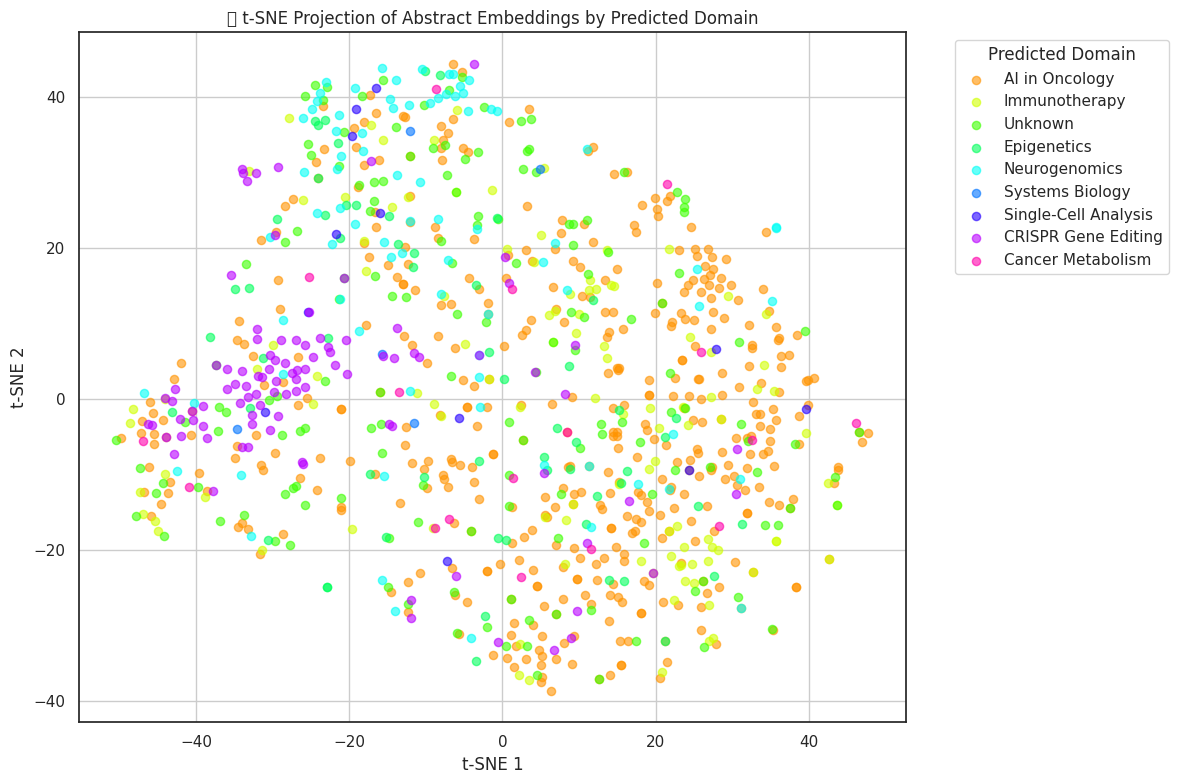

In [100]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# 1️⃣ t-SNE ile 2 boyuta indirgeme
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca', learning_rate='auto')
reduced = tsne.fit_transform(embeddings)

# 2️⃣ Koordinatları DataFrame'e ekle
df["tsne_1"] = reduced[:, 0]
df["tsne_2"] = reduced[:, 1]

# 3️⃣ Renk paleti ayarla
unique_domains = df["Predicted_Domain"].unique()
palette = sns.color_palette("hsv", len(unique_domains))

# 4️⃣ Plot
plt.figure(figsize=(12, 8))
for i, domain in enumerate(unique_domains):
    subset = df[df["Predicted_Domain"] == domain]
    plt.scatter(subset["tsne_1"], subset["tsne_2"], label=domain,
                alpha=0.6, s=35, color=palette[i])

plt.legend(title="Predicted Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("📊 t-SNE Projection of Abstract Embeddings by Predicted Domain")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.grid(True)
plt.show()


In [101]:
import numpy as np

# ✅ 1. Prediction_Confidence kolonu varsa filtrele, yoksa tüm veriyi al
if "Prediction_Confidence" in df.columns:
    high_confidence_mask = df["Prediction_Confidence"] > 0.9
else:
    high_confidence_mask = np.ones(len(df), dtype=bool)  # Hepsi yüksek kabul edilir

# ✅ 2. Domain vektörlerini hesapla (sadece yüksek güvenli örneklerle)
domain_vectors = {}

for domain in df["Predicted_Domain"].unique():
    # Yüksek güvenli ve ilgili domain'e ait olan satırları seç
    domain_mask = (df["Predicted_Domain"] == domain) & high_confidence_mask
    indices = df[domain_mask].index.tolist()

    # Vektörleri al
    if len(indices) > 0:
        vecs = np.array([embeddings[i] for i in indices])
        centroid = np.mean(vecs, axis=0)
        domain_vectors[domain] = centroid


In [102]:
def combine_predictions(row):
    if row["Predicted_Domain"] == row["Closest_Domain_By_Vector"]:
        return row["Predicted_Domain"]
    else:
        return row["Closest_Domain_By_Vector"]

df["Combined_Prediction"] = df.apply(combine_predictions, axis=1)


In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

# 1️⃣ Embedding'ler ve etiketler
X = embeddings  # (n_samples, 384) olmalı
y = df["Combined_Prediction"]  # Daha güvenilir etiketler

# 2️⃣ Etiketleri sayısallaştır
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3️⃣ Eğitim ve test seti
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 4️⃣ Modeli tanımla
clf = XGBClassifier(
    n_estimators=300,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 5️⃣ Modeli eğit
clf.fit(X_train, y_train)

# 6️⃣ Tahmin ve rapor
y_pred = clf.predict(X_test)

print("📊 Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 7️⃣ Normalize edilmiş confusion matrix
cm = pd.crosstab(
    le.inverse_transform(y_test),
    le.inverse_transform(y_pred),
    rownames=['Actual'],
    colnames=['Predicted'],
    normalize='index'
)
print("\n🔍 Normalized Confusion Matrix (per class):\n")
print(cm.round(2))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:19:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Classification Report (XGBoost):

                      precision    recall  f1-score   support

      AI in Oncology       0.71      0.93      0.81        60
 CRISPR Gene Editing       0.73      0.70      0.72        27
   Cancer Metabolism       0.67      0.46      0.55        13
         Epigenetics       0.73      0.57      0.64        14
       Immunotherapy       0.62      0.64      0.63        28
       Neurogenomics       0.71      0.86      0.78        29
Single-Cell Analysis       0.00      0.00      0.00         5
     Systems Biology       0.00      0.00      0.00         5
             Unknown       0.50      0.13      0.21        15

            accuracy                           0.68       196
           macro avg       0.52      0.48      0.48       196
        weighted avg       0.65      0.68      0.65       196


🔍 Normalized Confusion Matrix (per class):

Predicted             AI in Oncology  CRISPR Gene Editing  Cancer Metabolism  \
Actual                        

<ipython-input-104-473f4a0328be>:23: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


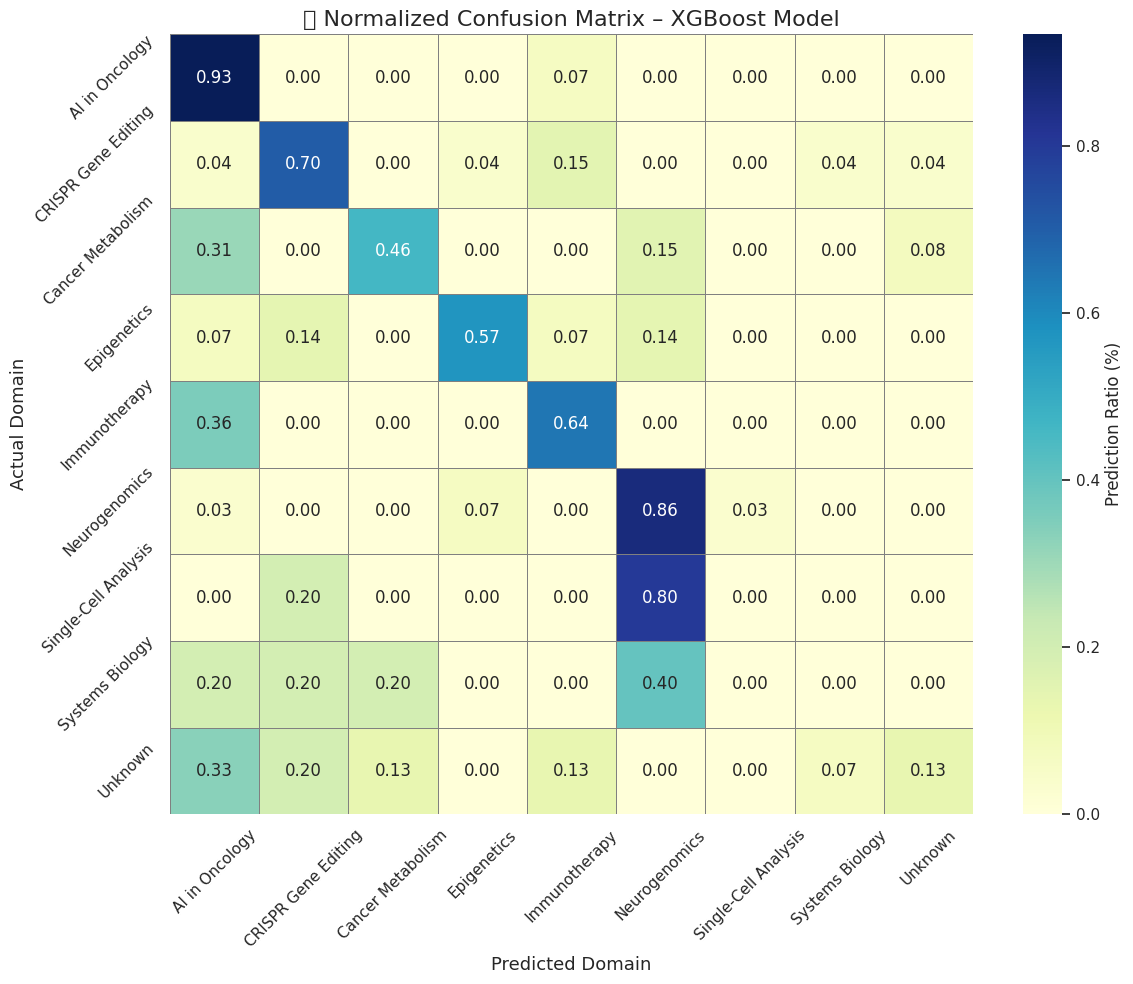

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# 🟨 1. Normalize confusion matrix (satır bazlı oran)
cm = confusion_matrix(y_test, y_pred, normalize='true')  # değerler 0-1 arasında

# 🟩 2. DataFrame'e çevir
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

# 🎨 3. Heatmap çizimi
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Prediction Ratio (%)'},
            linewidths=0.5, linecolor='gray')

plt.title("🔍 Normalized Confusion Matrix – XGBoost Model", fontsize=16)
plt.xlabel("Predicted Domain", fontsize=13)
plt.ylabel("Actual Domain", fontsize=13)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [105]:
from sklearn.model_selection import train_test_split

# 🎯 Split yapılırken index'leri de ayır
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y_encoded, df.index, test_size=0.2, stratify=y_encoded, random_state=42
)

# ✅ Tahminleri DataFrame'e geri yerleştir
df.loc[idx_test, "ML_Domain_Prediction"] = le.inverse_transform(y_pred)

# ✅ Text rule vs ML eşleşmesini kontrol et
df["Match_Text_vs_ML"] = df["Predicted_Domain"] == df["ML_Domain_Prediction"]
ml_accuracy = df["Match_Text_vs_ML"].mean()

# ✅ Çıktı
print(f"🧠 Text Rule vs ML Model Prediction Accuracy: {ml_accuracy:.2%}")


🧠 Text Rule vs ML Model Prediction Accuracy: 9.01%


<ipython-input-106-5bd4f9e0a70b>:37: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


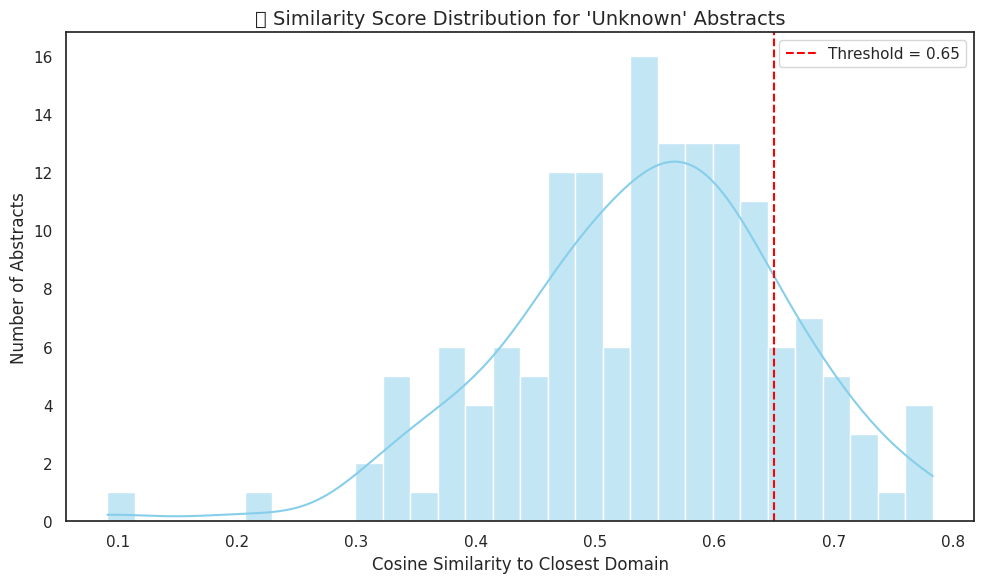

In [106]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# 🔍 1. Unknown domain'li verileri al
unknown_df = df[df["Predicted_Domain"] == "Unknown"].copy()
unknown_embeddings = embeddings[unknown_df.index]

# 🔁 2. Domain merkezleri ve karşılık gelen isimler
domain_names = list(domain_vectors.keys())
domain_centroids = np.array(list(domain_vectors.values()))

# 🎯 3. Cosine similarity hesapla
similarities = cosine_similarity(unknown_embeddings, domain_centroids)

# 🔍 4. En benzer domain ve skor
unknown_df["Predicted_By_Vector"] = [domain_names[i] for i in similarities.argmax(axis=1)]
unknown_df["Similarity_Score"] = similarities.max(axis=1)

# 🛑 5. Eşik değere göre güvenli tahminler
threshold = 0.65
unknown_df["Final_Prediction"] = unknown_df.apply(
    lambda row: row["Predicted_By_Vector"] if row["Similarity_Score"] >= threshold else "Uncertain",
    axis=1
)

# 📈 6. Histogram: Benzerlik skorlarının dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(unknown_df["Similarity_Score"], bins=30, kde=True, color="skyblue")
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title("🔍 Similarity Score Distribution for 'Unknown' Abstracts", fontsize=14)
plt.xlabel("Cosine Similarity to Closest Domain")
plt.ylabel("Number of Abstracts")
plt.legend()
plt.tight_layout()
plt.show()


In [107]:
# Kaç tanesi kesin olarak tahmin edildi?
num_confident = (unknown_df["Final_Prediction"] != "Uncertain").sum()
print(f"✅ High-confidence reassignments: {num_confident} / {len(unknown_df)}")

#  Domain dağılımı
print("\n📊 Final Predicted Domains (Confidence ≥ Threshold):")
print(unknown_df["Final_Prediction"].value_counts())


✅ High-confidence reassignments: 26 / 153

📊 Final Predicted Domains (Confidence ≥ Threshold):
Final_Prediction
Uncertain              127
AI in Oncology          14
Neurogenomics            5
Immunotherapy            3
CRISPR Gene Editing      2
Cancer Metabolism        1
Unknown                  1
Name: count, dtype: int64


<ipython-input-108-a160ef248c68>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-108-a160ef248c68>:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


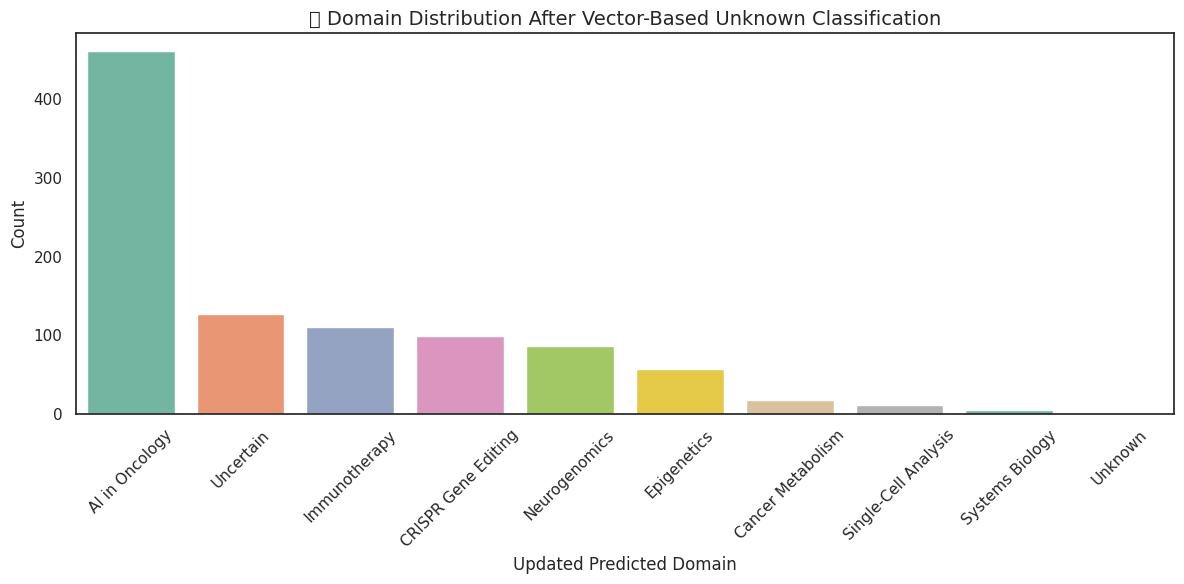

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🧠 1. İlk olarak varsayılan değeri rule-based tahminle başlat
df["Predicted_Domain_Updated"] = df["Predicted_Domain"]

# 🔁 2. Unknown olarak etiketlenmiş ama vektör tabanlı tahmin almış verileri güncelle
df.loc[unknown_df.index, "Predicted_Domain_Updated"] = unknown_df["Final_Prediction"]

# 📊 3. Güncellenmiş domain dağılımını görselleştir
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x="Predicted_Domain_Updated",
    order=df["Predicted_Domain_Updated"].value_counts().index,
    palette="Set2"
)
plt.xticks(rotation=45)
plt.title("🔍 Domain Distribution After Vector-Based Unknown Classification", fontsize=14)
plt.xlabel("Updated Predicted Domain", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


In [109]:
from sklearn.preprocessing import LabelEncoder

# 🔢 1. Minimum örnek sayısı belirle
min_class_count = 20

# 📊 2. Sınıf dağılımını al
class_counts = df["Predicted_Domain_Updated"].value_counts()

# ✅ 3. Yeterli sayıda örneği olan sınıfları filtrele
valid_domains = class_counts[class_counts >= min_class_count].index.tolist()
filtered_df = df[df["Predicted_Domain_Updated"].isin(valid_domains)].copy()

# 🧠 4. Embedding ve etiketleri eşleştir
X = embeddings[filtered_df.index]         # Embedding dizisinden aynı index'leri al
y = filtered_df["Predicted_Domain_Updated"]

# 🏷️ (İsteğe bağlı) label encode
le = LabelEncoder()
y_encoded = le.fit_transform(y)


📊 Classification Report (Random Forest):

                     precision    recall  f1-score   support

     AI in Oncology       0.52      0.92      0.66        92
CRISPR Gene Editing       0.50      0.40      0.44        20
        Epigenetics       0.00      0.00      0.00        12
      Immunotherapy       0.33      0.05      0.08        22
      Neurogenomics       0.50      0.12      0.19        17
          Uncertain       0.50      0.04      0.07        26

           accuracy                           0.51       189
          macro avg       0.39      0.25      0.24       189
       weighted avg       0.46      0.51      0.41       189



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


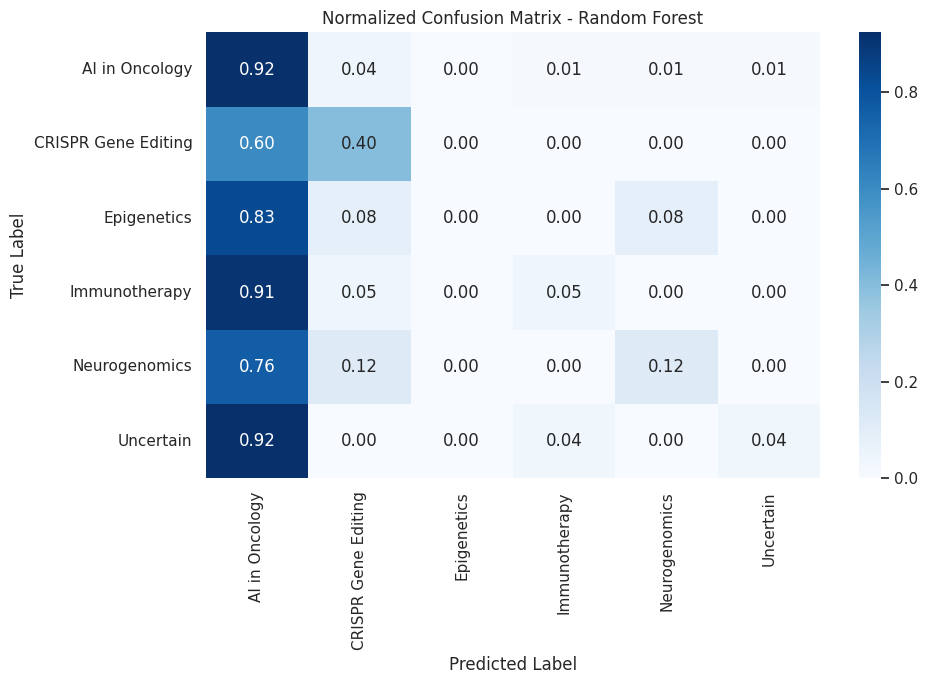

In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🏷️ Etiketleri encode et
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 🔀 Eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

# 🌲 Random Forest modelini oluştur ve eğit
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# 🔍 Tahmin yap
y_pred = clf.predict(X_test)

# 📊 Sınıflandırma raporunu yazdır
print("📊 Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 📉 Opsiyonel: Confusion matrix görselleştirme
cm = confusion_matrix(y_test, y_pred, normalize='true')  # normalize='true' → oran bazlı
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Normalized Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [111]:
import pandas as pd

df = pd.read_csv("semantic_bridges.csv")  # Artık asıl veri bu
df.to_csv("filtered_abstracts.csv", index=False)


In [112]:
import pandas as pd
import numpy as np
import os
import torch
from sentence_transformers import SentenceTransformer

# 🔁 Ayarlar
embedding_path = "/content/filtered_abstracts_embeddings.npy"
data_path = "/content/processed_abstracts.csv"
batch_size = 128
model_name = "allenai-specter"

# 🔽 1. Veriyi yükle
print("📂 Veriyi yükleniyor...")
try:
    df = pd.read_csv(data_path)
    print(f"✅ Veri yüklendi: {data_path}")
except FileNotFoundError:
    raise FileNotFoundError(f"❌ Dosya bulunamadı: {data_path}")

# 🔍 Kontrol: Abstract sütunu boş mu?
if "Abstract" not in df.columns or df["Abstract"].isnull().all():
    raise ValueError("❌ 'Abstract' sütunu boş ya da bulunamadı. Lütfen verinizi kontrol edin.")

# ⚙️ 2. GPU kontrolü
device = "cuda" if torch.cuda.is_available() else "cpu"
print("📦 Kullanılan cihaz:", device)

# 🚀 3. Embedding dosyası varsa yükle
if os.path.exists(embedding_path):
    print("🔄 Embedding dosyası bulundu, yüklüyor...")
    embeddings = np.load(embedding_path)
    print(f"✅ Embedding başarıyla yüklendi: {embedding_path}")
else:
    print("⚙️ Embedding hesaplanıyor...")
    model = SentenceTransformer(model_name, device=device)

    # Abstract'ları listeye dönüştür
    texts = df["Abstract"].astype(str).tolist()

    # Batch işlemi ile embedding'leri hesapla
    embeddings = model.encode(
        texts,
        batch_size=batch_size,
        show_progress_bar=True,
        device=device
    )

    # Embedding dosyasını kaydet
    np.save(embedding_path, embeddings)
    print(f"✅ Embedding başarıyla kaydedildi: {embedding_path}")

# ✅ Embedding shape ve örnek
print("✅ Embedding shape:", embeddings.shape)
print("📄 İlk özet:", df["Abstract"].iloc[0][:200])


📂 Veriyi yükleniyor...
✅ Veri yüklendi: /content/processed_abstracts.csv
📦 Kullanılan cihaz: cpu
🔄 Embedding dosyası bulundu, yüklüyor...
✅ Embedding başarıyla yüklendi: /content/filtered_abstracts_embeddings.npy
✅ Embedding shape: (977, 384)
📄 İlk özet: [<sup>18</sup>F]NaF is a potential biomarker for assessing cardiac risk. Automated analysis of [<sup>18</sup>F]NaF positron emission tomography (PET) images, specifically through quantitative image an


In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
print(df.columns.tolist())


['Abstract', 'Domain', 'Cleaned_Abstract']


In [115]:
# Domain'leri gruplamak için bir fonksiyon tanımlayalım
def consolidate_domain_v2(d, group_map=None):
    """
    Verilen domain'i, belirli bir eşleştirme haritasına göre sadeleştirir.

    Args:
    - d (str): Domain adı
    - group_map (dict): Domain'leri gruplamak için bir eşleştirme haritası (optional)

    Returns:
    - str: Sadeleştirilmiş domain adı
    """
    if group_map is None:
        # Varsayılan harita (yeni domain eşleştirmeleri eklenebilir)
        group_map = {
            "Cancer Metabolism": "Gene Regulation",
            "Epigenetics": "Gene Regulation",
            "Neurogenomics": "Gene Regulation",
        }

    # Eğer domain grupta varsa, onu dön
    return group_map.get(d, d)  # Eğer grup bulunamazsa orijinal domain döner

# Grup eşleştirmeleri (ekstra domainler eklenebilir)
domain_group_map = {
    "Cancer Metabolism": "Gene Regulation",
    "Epigenetics": "Gene Regulation",
    "Neurogenomics": "Gene Regulation",
    "Immunotherapy": "Cancer Research",  # Ekstra bir örnek
}

# Domain sütununu kullanarak "Domain_Collapsed" sütununu oluştur
df["Domain_Collapsed"] = df["Domain"].apply(lambda x: consolidate_domain_v2(x, domain_group_map))

# Kontrol için ilk 5 satırı yazdır
print(df[["Domain", "Domain_Collapsed"]].head())


           Domain Domain_Collapsed
0  AI in Oncology   AI in Oncology
1  AI in Oncology   AI in Oncology
2  AI in Oncology   AI in Oncology
3  AI in Oncology   AI in Oncology
4  AI in Oncology   AI in Oncology


In [116]:
print(len(embeddings))          # örneğin 2784
print(len(df))                  # örneğin 3810


977
979


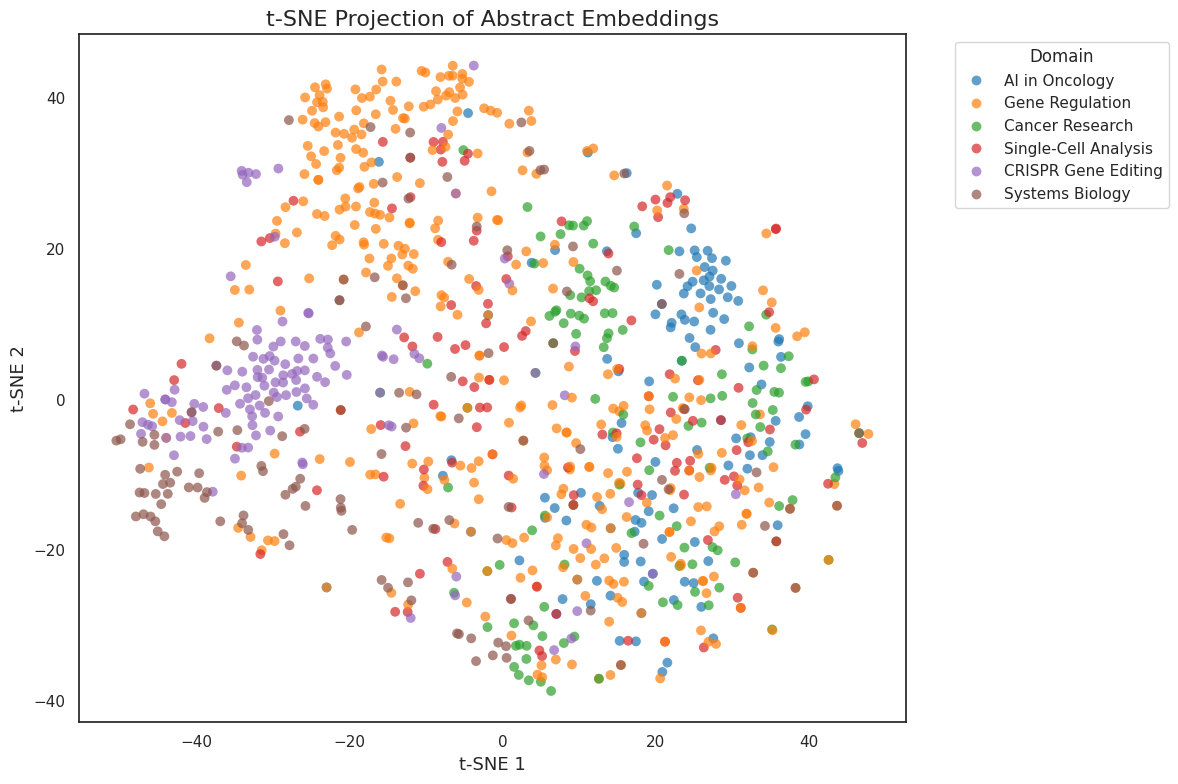

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# 1️⃣ DataFrame ile embedding satırlarını eşitle
df = df.reset_index(drop=True).iloc[: embeddings.shape[0]].copy()

# 2️⃣ t-SNE ile 2 boyuta indirgeme
tsne = TSNE(
    n_components=2,
    perplexity=30,
    init="pca",
    learning_rate="auto",
    random_state=42
)
tsne_results = tsne.fit_transform(embeddings)
df["tsne_1"], df["tsne_2"] = tsne_results[:, 0], tsne_results[:, 1]

# 3️⃣ Görselleştirme
plt.figure(figsize=(12, 8))
sns.set(style="white")

sns.scatterplot(
    data=df,
    x="tsne_1",
    y="tsne_2",
    hue="Domain_Collapsed",
    palette="tab10",
    s=50,
    alpha=0.7,
    edgecolor="None",
    legend="full"
)

plt.title("t-SNE Projection of Abstract Embeddings", fontsize=16)
plt.xlabel("t-SNE 1", fontsize=13)
plt.ylabel("t-SNE 2", fontsize=13)

# Legend'i grafiğin dışına taşı
plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


📊 Classification Report (Random Forest):

                      precision    recall  f1-score   support

      AI in Oncology       0.56      0.38      0.45        24
 CRISPR Gene Editing       0.84      0.64      0.73        25
     Cancer Research       0.44      0.17      0.24        24
     Gene Regulation       0.45      0.88      0.60        73
Single-Cell Analysis       0.00      0.00      0.00        25
     Systems Biology       0.75      0.24      0.36        25

            accuracy                           0.51       196
           macro avg       0.51      0.38      0.40       196
        weighted avg       0.49      0.51      0.45       196



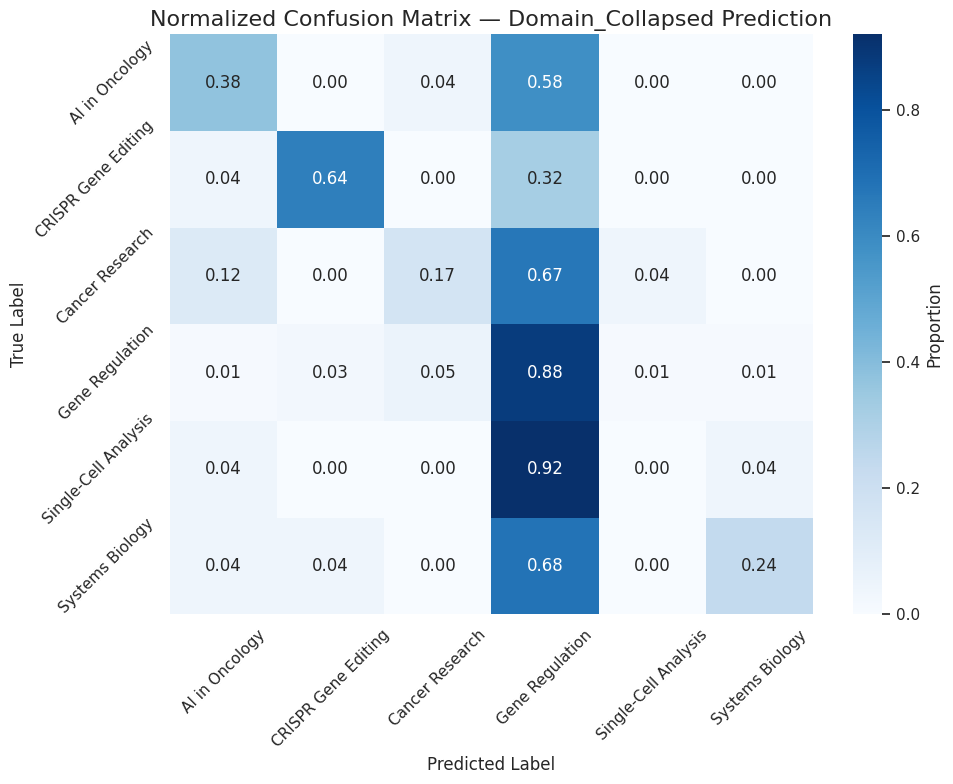

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 1️⃣ “Uncertain” olmayan satırları al
mask = df["Domain_Collapsed"] != "Uncertain"
X = embeddings[mask]
y = df.loc[mask, "Domain_Collapsed"]

# 2️⃣ Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3️⃣ Eğitim/test setine ayır (stratifiyeli)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

# 4️⃣ Random Forest sınıflayıcı (class_weight ile dengesizliği tolere et)
clf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
clf.fit(X_train, y_train)

# 5️⃣ Tahmin ve sınıflandırma raporu
y_pred = clf.predict(X_test)
print("📊 Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 6️⃣ Normalize Edilmiş Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize="true")
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_df,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar_kws={"label": "Proportion"}
)
plt.title("Normalized Confusion Matrix — Domain_Collapsed Prediction", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


Uncertain satır sayısı: 0


In [119]:
# 1️⃣ “Uncertain” etiketli örnekleri filtrele
uncertain_mask = df["Domain_Collapsed"] == "Uncertain"
uncertain_df = df[uncertain_mask].copy()

# 2️⃣ Varsa, ML model ile tahmin et ve geri yaz
if not uncertain_df.empty:
    # Embedding’leri al
    uncertain_embs = embeddings[uncertain_df.index]
    # Tahmin
    preds = clf.predict(uncertain_embs)
    # Ters encode
    recovered = le.inverse_transform(preds)
    # DataFrame’e ata
    df.loc[uncertain_mask, "Domain_Final"] = recovered

# 3️⃣ “Uncertain” olmayanlar için final = collapsed
df.loc[~uncertain_mask, "Domain_Final"] = df.loc[~uncertain_mask, "Domain_Collapsed"]


In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ “Uncertain” etiketli örneklerin varlığını ve model tahminini kontrol et
uncertain_mask = df["Domain_Collapsed"] == "Uncertain"
if uncertain_mask.any() and "Domain_Final" in df.columns:
    # 2️⃣ Yeniden atanmış domain’lerin özetini oluştur
    summary = (
        df.loc[uncertain_mask, "Domain_Final"]
          .value_counts()
          .reset_index(name="Count")
          .rename(columns={"index": "Predicted_Domain"})
    )
    summary["Percentage"] = 100 * summary["Count"] / summary["Count"].sum()

    # 3️⃣ Görselleştir
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=summary,
        x="Predicted_Domain",
        y="Count",
        palette="Set2"
    )
    plt.title("Uncertain Abstracts Reassigned to Domains", fontsize=14)
    plt.xlabel("Reassigned Domain", fontsize=12)
    plt.ylabel("Number of Abstracts", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("🔍 Uyarı: 'Uncertain' veri bulunamadı veya yeniden atama yapılmadı.")


🔍 Uyarı: 'Uncertain' veri bulunamadı veya yeniden atama yapılmadı.


🔍 Random Forest Results:

                      precision    recall  f1-score   support

      AI in Oncology       0.56      0.38      0.45        24
 CRISPR Gene Editing       0.84      0.64      0.73        25
     Cancer Research       0.44      0.17      0.24        24
     Gene Regulation       0.45      0.88      0.60        73
Single-Cell Analysis       0.00      0.00      0.00        25
     Systems Biology       0.75      0.24      0.36        25

            accuracy                           0.51       196
           macro avg       0.51      0.38      0.40       196
        weighted avg       0.49      0.51      0.45       196



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚡ XGBoost Results:

                      precision    recall  f1-score   support

      AI in Oncology       0.46      0.46      0.46        24
 CRISPR Gene Editing       0.78      0.72      0.75        25
     Cancer Research       0.53      0.33      0.41        24
     Gene Regulation       0.56      0.78      0.66        73
Single-Cell Analysis       0.50      0.36      0.42        25
     Systems Biology       0.80      0.48      0.60        25

            accuracy                           0.59       196
           macro avg       0.61      0.52      0.55       196
        weighted avg       0.60      0.59      0.58       196



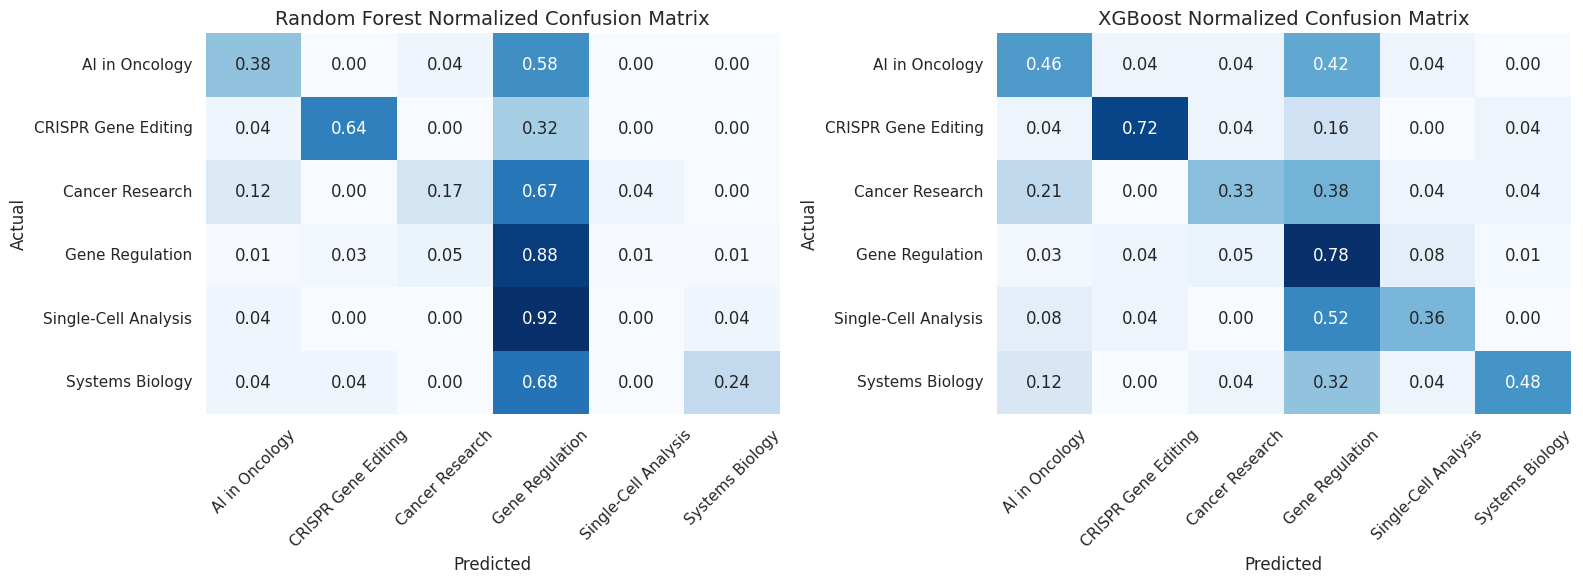

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1️⃣ Veriyi ve etiketleri hazırla
X = embeddings
y = df["Domain_Final"]

# 2️⃣ Etiketleri sayısallaştır
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3️⃣ Eğitim-test setine ayır (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

# 4️⃣ Random Forest modeli
rf_clf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print("🔍 Random Forest Results:\n")
print(classification_report(y_test, rf_pred, target_names=le.classes_))

# 5️⃣ XGBoost modeli
xgb_clf = XGBClassifier(
    n_estimators=300,
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

print("⚡ XGBoost Results:\n")
print(classification_report(y_test, xgb_pred, target_names=le.classes_))

# 6️⃣ Opsiyonel: Confusion Matrix Karşılaştırması
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, (pred, title) in zip(
    axes,
    [(rf_pred, "Random Forest"), (xgb_pred, "XGBoost")]
):
    cm = confusion_matrix(y_test, pred, normalize="true")
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        xticklabels=le.classes_,
        yticklabels=le.classes_,
        cmap="Blues",
        cbar=False,
        ax=ax
    )
    ax.set_title(f"{title} Normalized Confusion Matrix", fontsize=14)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


📊 Classification Report (XGBoost):

                      precision    recall  f1-score   support

      AI in Oncology       0.56      0.42      0.48        24
 CRISPR Gene Editing       0.86      0.76      0.81        25
   Cancer Metabolism       0.24      0.28      0.26        25
         Epigenetics       0.62      0.52      0.57        25
       Immunotherapy       0.42      0.33      0.37        24
       Neurogenomics       0.55      0.70      0.62        23
Single-Cell Analysis       0.27      0.32      0.29        25
     Systems Biology       0.50      0.56      0.53        25

            accuracy                           0.48       196
           macro avg       0.50      0.49      0.49       196
        weighted avg       0.50      0.48      0.49       196



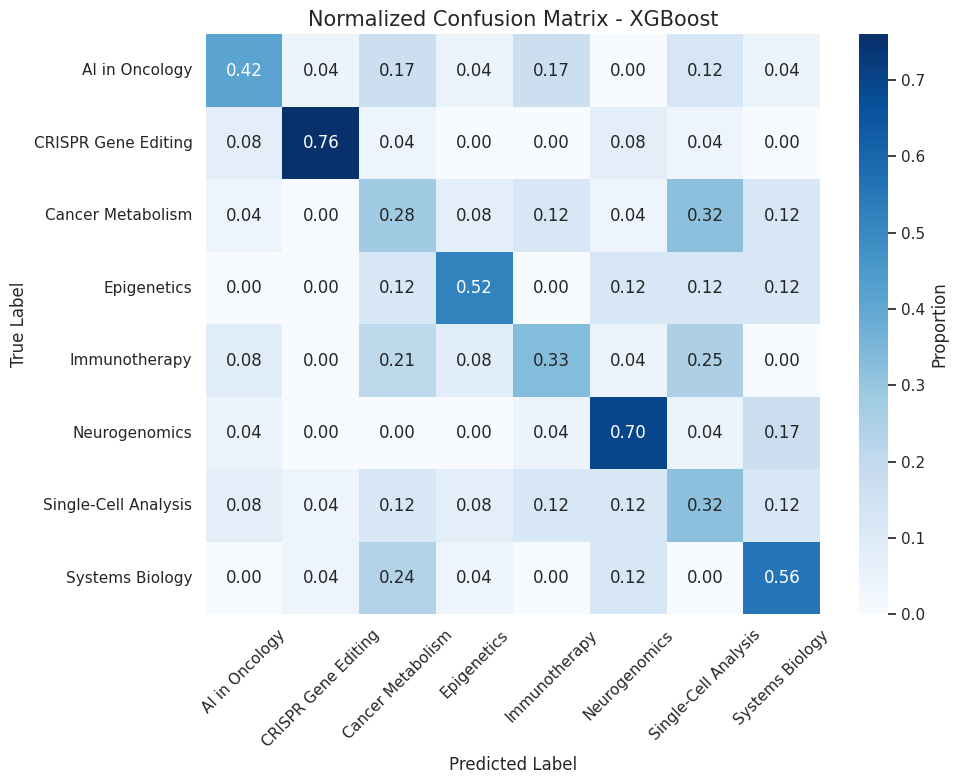

In [122]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Giriş: Embedding'ler ve etiketler (Combined_Prediction kullanılacaksa bu kısmı güncelle)
X = embeddings
y = df["Domain"]  # Alternatif: df["Domain_Final"] veya df["Predicted_Domain"]

# 2️⃣ Etiketleri encode et
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3️⃣ Train-test böl
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 4️⃣ Hızlı optimize edilmiş XGBoost modeli
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    verbosity=0,
    random_state=42
)

# 5️⃣ Modeli eğit
xgb_model.fit(X_train, y_train)

# 6️⃣ Tahmin yap ve sınıflandırma raporu al
y_pred = xgb_model.predict(X_test)

print("📊 Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 7️⃣ Confusion Matrix - Normalized
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Blues", cbar_kws={"label": "Proportion"})
plt.title("Normalized Confusion Matrix - XGBoost", fontsize=15)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-123-b01e75b7d3f9>:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


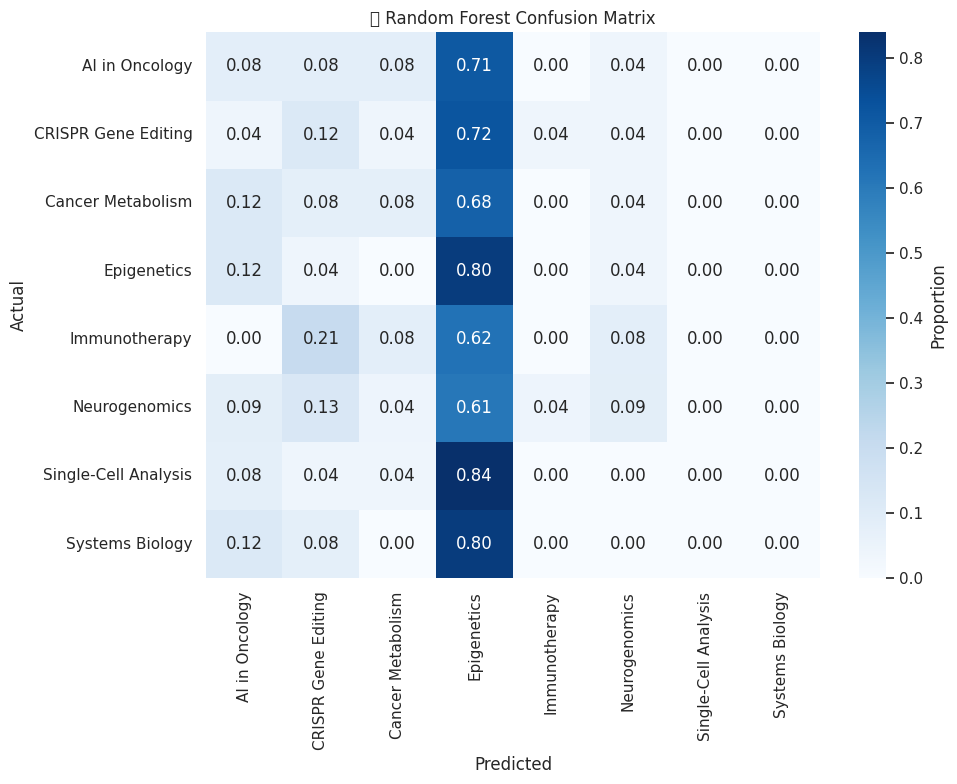

<ipython-input-123-b01e75b7d3f9>:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


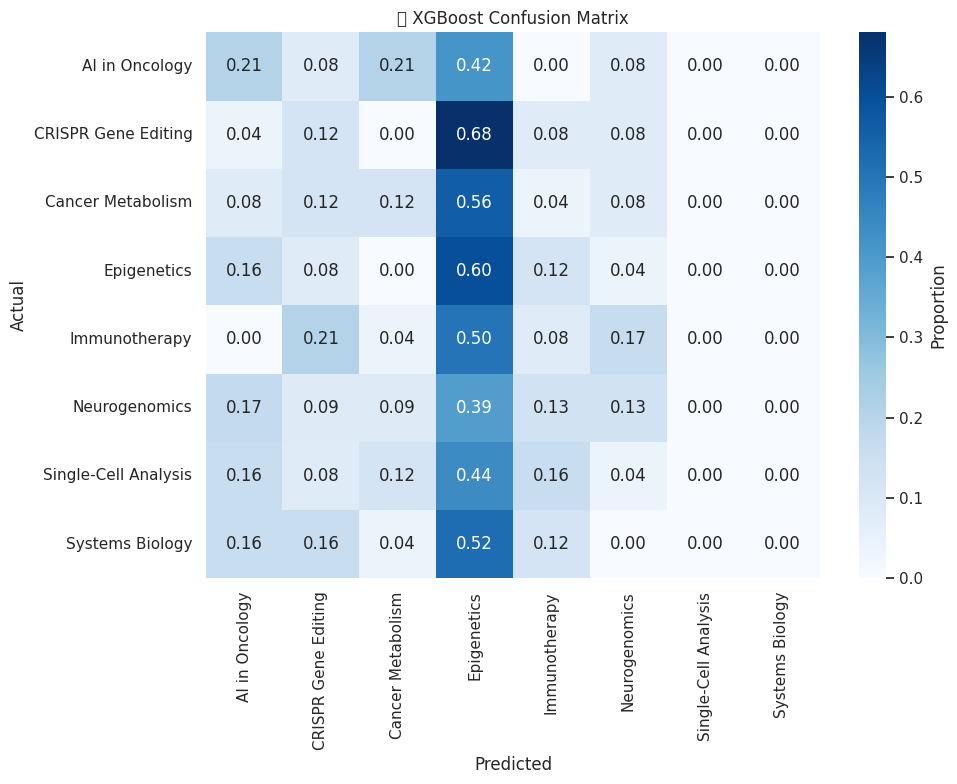

In [123]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title, normalize=True, cmap="Blues"):
    cm = confusion_matrix(y_true, y_pred)

    # Normalize et (oransal görselleştirme için)
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d",
                xticklabels=classes, yticklabels=classes,
                cmap=cmap, cbar_kws={'label': 'Proportion' if normalize else 'Count'})
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"📊 {title}")
    plt.tight_layout()
    plt.show()

# 🎯 Uygulama
plot_confusion_matrix(y_test, rf_pred, classes=le.classes_, title="Random Forest Confusion Matrix", normalize=True)
plot_confusion_matrix(y_test, xgb_pred, classes=le.classes_, title="XGBoost Confusion Matrix", normalize=True)


In [124]:
from sklearn.metrics import f1_score, accuracy_score

print("RF F1:", f1_score(y_test, rf_pred, average='macro'))
print("XGB F1:", f1_score(y_test, xgb_pred, average='macro'))

print("RF Acc:", accuracy_score(y_test, rf_pred))
print("XGB Acc:", accuracy_score(y_test, xgb_pred))


RF F1: 0.09032048891693928
XGB F1: 0.1218201754385965
RF Acc: 0.14795918367346939
XGB Acc: 0.15816326530612246


<ipython-input-125-91b2be7235b1>:33: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


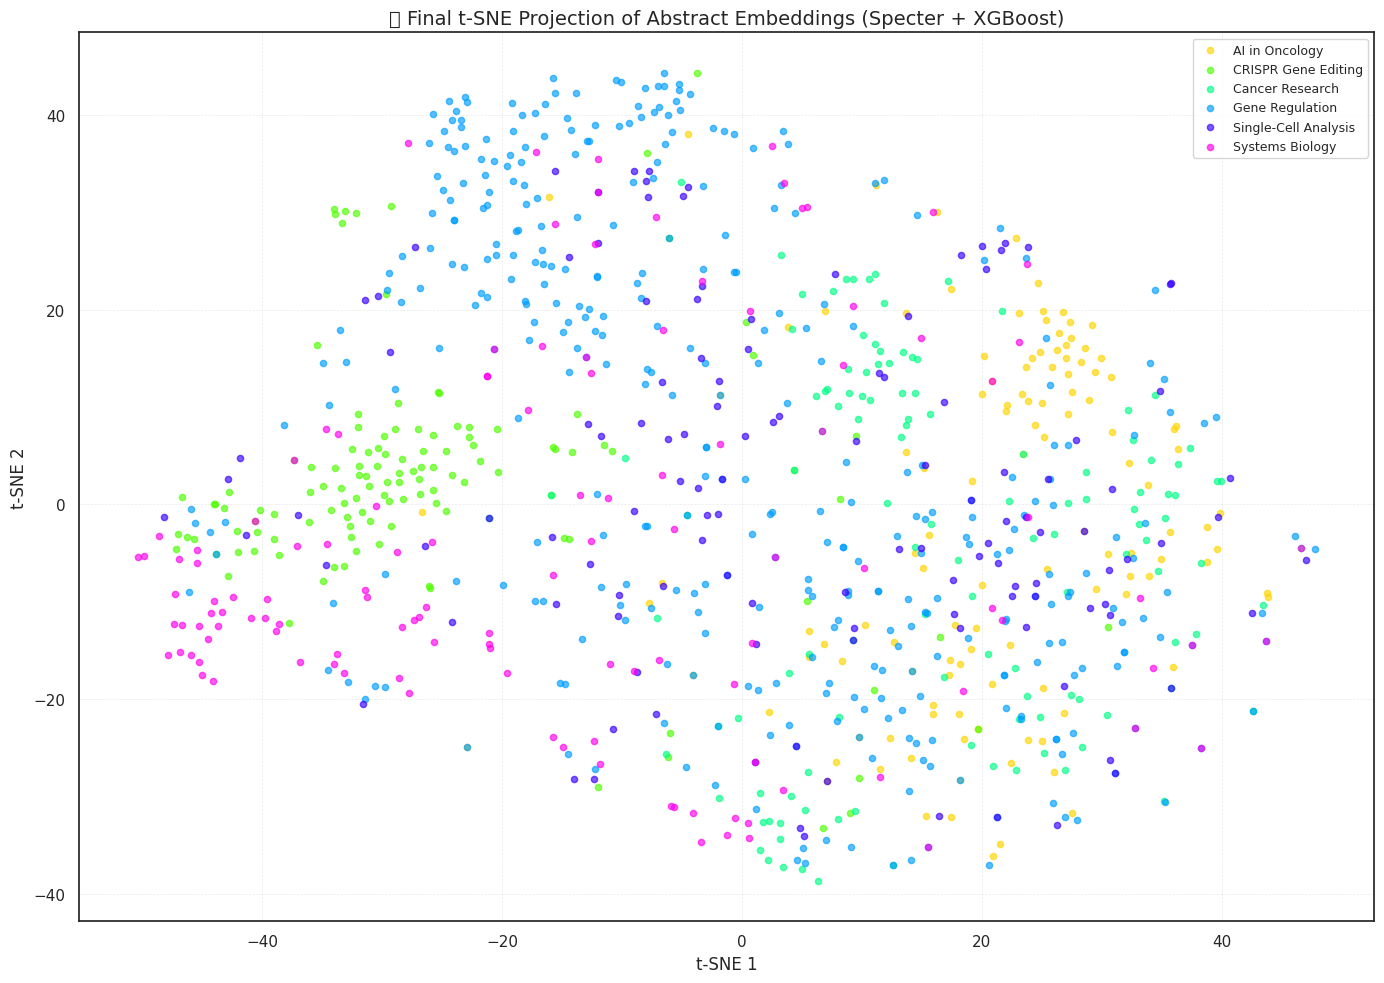

In [125]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# t-SNE boyut indirgeme
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne_model.fit_transform(embeddings)

# Sonuçları DataFrame'e aktar
df["tsne_x"] = tsne_result[:, 0]
df["tsne_y"] = tsne_result[:, 1]

# Renk paleti belirle (daha okunabilir görsel için)
palette = sns.color_palette("hsv", n_colors=df["Domain_Final"].nunique())

# Görselleştirme
plt.figure(figsize=(14, 10))
for i, domain in enumerate(sorted(df["Domain_Final"].unique())):
    subset = df[df["Domain_Final"] == domain]
    plt.scatter(
        subset["tsne_x"], subset["tsne_y"],
        label=domain,
        color=palette[i],
        alpha=0.65,
        s=20
    )

plt.title("🔬 Final t-SNE Projection of Abstract Embeddings (Specter + XGBoost)", fontsize=14)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(loc="best", fontsize=9)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.tight_layout()
plt.show()


<ipython-input-126-ce38c12ca571>:15: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-126-ce38c12ca571>:18: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.savefig("final_tsne_specter.png", dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


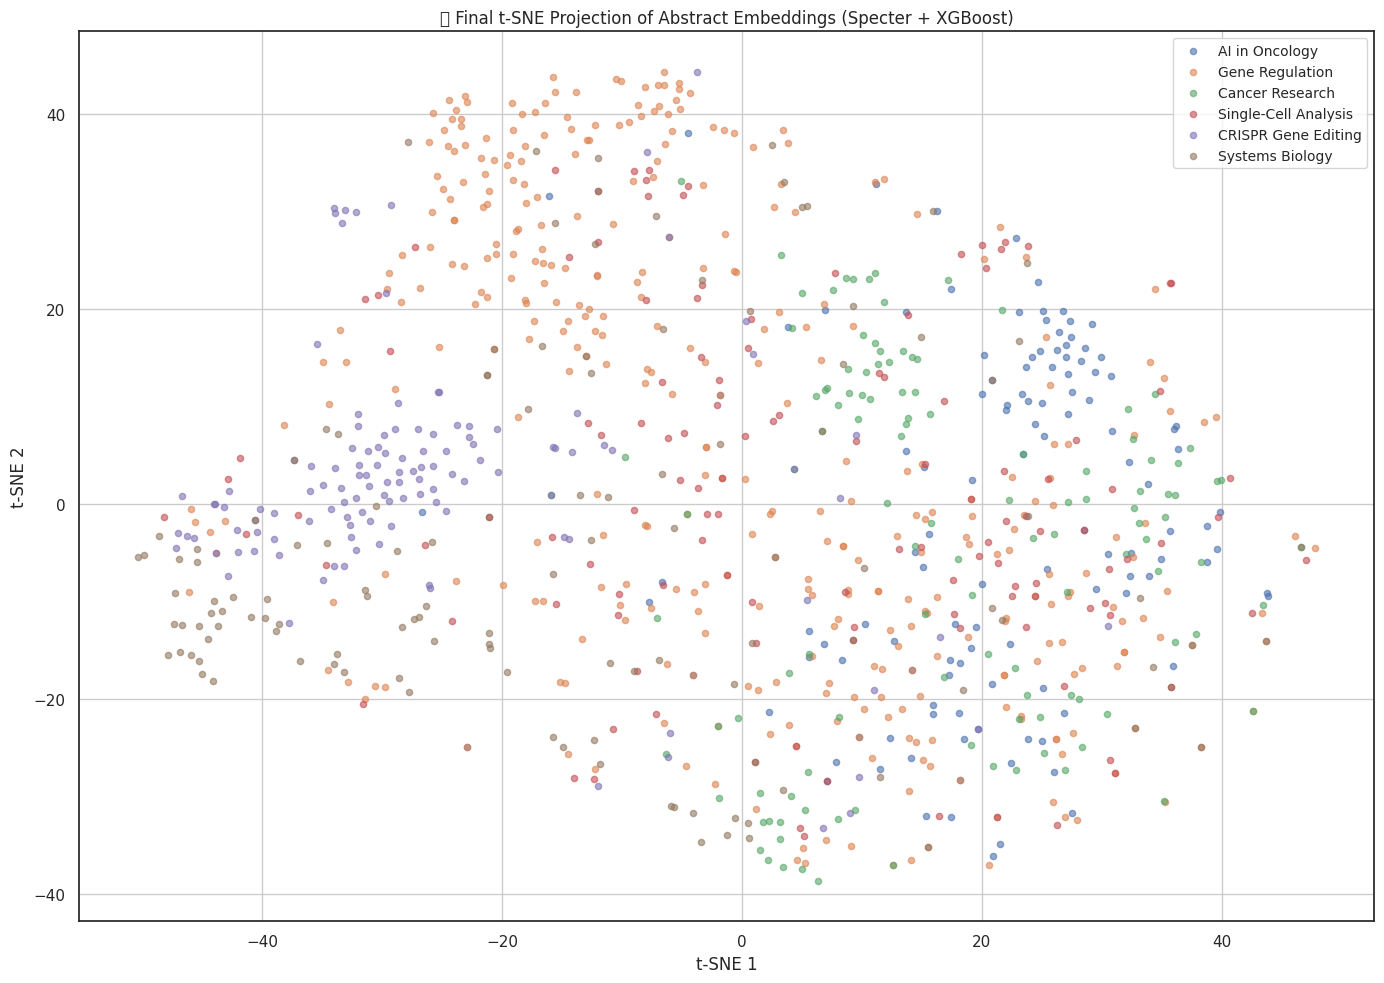

In [126]:
import matplotlib.pyplot as plt

# t-SNE çizimi
plt.figure(figsize=(14, 10))

for domain in df["Domain_Final"].unique():
    subset = df[df["Domain_Final"] == domain]
    plt.scatter(subset["tsne_x"], subset["tsne_y"], label=domain, alpha=0.6, s=20)

plt.title("🧬 Final t-SNE Projection of Abstract Embeddings (Specter + XGBoost)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(loc="best", fontsize=10)
plt.grid(True)
plt.tight_layout()

# 💾 Kaydetme
plt.savefig("final_tsne_specter.png", dpi=300)

# 📌 Ekranda gösterme (isteğe bağlı)
plt.show()


In [127]:
plt.savefig("final_tsne_specter.pdf")
from google.colab import files
files.download("final_tsne_specter.png")  # veya .pdf, .svg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [128]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# ✅ Embedding boyutu final_model ile aynı olmalı (MiniLM = 384)
# ❗️ Eğer XGBoost modelini allenai-specter ile eğitmediysen, MiniLM kullan!
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # 384-dim

def analyze_abstract(user_input, top_k=5):
    if not isinstance(user_input, str) or len(user_input.strip()) < 20:
        return {"error": "❌ Lütfen geçerli ve yeterli uzunlukta bir özet girin (en az 20 karakter)."}

    try:
        # 1️⃣ Kullanıcı girdisini embed et
        user_vec = embedding_model.encode([user_input])

        # 2️⃣ Makine öğrenmesi modeliyle domain tahmini
        domain_idx = final_model.predict(user_vec)[0]
        predicted_domain = le.inverse_transform([domain_idx])[0]

        # 3️⃣ O domain'e ait veri ve embedding'leri filtrele
        domain_df = df[df["Domain_Final"] == predicted_domain].copy()
        if domain_df.empty:
            return {"error": f"❌ '{predicted_domain}' domain'i için eşleşen veri bulunamadı."}

        domain_embeds = embeddings[domain_df.index]

        # 4️⃣ Benzerlik skorlarını hesapla
        sims = cosine_similarity(user_vec, domain_embeds)[0]
        top_idx = sims.argsort()[::-1][:top_k]

        # 5️⃣ En benzer örnekleri al
        top_examples = domain_df.iloc[top_idx]
        top_scores = sims[top_idx]

        # 6️⃣ Yapılandırılmış sonuç formatı
        top_matches = [
            {
                "similarity_score": round(float(score), 4),
                "matched_abstract": abstract
            }
            for score, abstract in zip(top_scores, top_examples["Abstract"])
        ]

        return {
            "predicted_domain": predicted_domain,
            "top_k_matches": top_matches
        }

    except Exception as e:
        return {"error": f"⚠️ Sistemsel hata oluştu: {str(e)}"}


In [129]:
from sklearn.metrics.pairwise import cosine_similarity

def analyze_abstract(user_input, top_k=5):
    try:
        # 🔎 1. Girdi doğrulama
        if not isinstance(user_input, str) or len(user_input.strip()) < 20:
            return {"error": "❌ Lütfen en az 20 karakterlik geçerli bir özet girin."}

        # 🔬 2. Girdi metnini embed et
        user_vec = specter_model.encode([user_input])  # ✅ doğru model (MiniLM veya Specter)

        # 🧠 3. Domain tahmini
        domain_pred_idx = final_model.predict(user_vec)[0]
        domain_pred = le.inverse_transform([domain_pred_idx])[0]

        # 📚 4. Tahmin edilen domain'deki verileri al
        domain_df = df[df["Domain_Final"] == domain_pred].copy()
        if domain_df.empty:
            return {"error": f"'{domain_pred}' domain'i için örnek bulunamadı."}

        domain_embeds = embeddings[domain_df.index]

        # 🧮 5. Benzerlik skorları
        sims = cosine_similarity(user_vec, domain_embeds)[0]
        top_idx = sims.argsort()[::-1][:top_k]
        top_examples = domain_df.iloc[top_idx]
        top_scores = sims[top_idx]

        # 🧾 6. Yapılandırılmış sonuç
        results = {
            "predicted_domain": domain_pred,
            "top_matches": [
                {
                    "similarity_score": round(float(score), 4),
                    "matched_abstract": str(abstract)
                }
                for abstract, score in zip(top_examples["Abstract"], top_scores)
            ]
        }

        return results

    except Exception as e:
        return {"error": f"⚠️ Hata oluştu: {str(e)}"}


In [130]:
final_model = clf  # XGBoost modelini analiz fonksiyonuna tanıt
from sentence_transformers import SentenceTransformer

# ✅ Modeli yeniden tanımla
specter_model = SentenceTransformer("all-MiniLM-L6-v2")

# ✅ XGBoost modelini tanımla
final_model = clf  # <--- Bu satır eksikti

# ✅ Örnek abstract'ı analiz et
result = analyze_abstract("CRISPR-Cas9 based editing of PD-L1 gene leads to increased T-cell activation...")

if "error" in result:
    print("⚠️", result["error"])
else:
    print("🔬 Predicted Domain:", result["predicted_domain"])
    for i, match in enumerate(result["top_matches"], 1):
        print(f"\n🔹 Match {i} (Score: {match['similarity_score']}):")
        print(match["matched_abstract"][:300] + "...")



🔬 Predicted Domain: CRISPR Gene Editing

🔹 Match 1 (Score: 0.5959):
Entamoeba histolytica is the causative agent of amoebiasis, a significant source of morbidity and mortality in developing nations. Despite this, E. histolytica is understudied, leading to few treatment options and a poor understanding of pathogenesis. Genetic tools have historically been limited. By...

🔹 Match 2 (Score: 0.5648):
Hemophilia, a congenital bleeding disorder, can cause arthropathy, impaired mobility, pain, and life-threatening hemorrhage events, significantly impacting quality of life for patients and caregivers. Current therapies, although effective, necessitate costly lifelong treatment, often in specialized ...

🔹 Match 3 (Score: 0.5616):
Pancreatic cancer is one of the main causes of cancer-related deaths, especially pancreatic ductal adenocarcinoma, and it's characterized by a poor prognosis. The KRAS gene mutation is prevalent in about 85% of pancreatic cancer cases, which is a significant factor in

# APP demo

In [77]:
!pip install streamlit
!pip install sentence-transformers
!pip install xgboost
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/

In [131]:
user_input = """
We developed a CRISPR-based platform to investigate gene regulation in tumor cells with high PD-L1 expression.
"""

# 1️⃣ Embed et
user_vec = specter_model.encode([user_input])

# 2️⃣ Tahmin olasılıkları
probas = final_model.predict_proba(user_vec)[0]

# 3️⃣ En güçlü tahmini al
domain_pred_idx = np.argmax(probas)
domain_pred = le.inverse_transform([domain_pred_idx])[0]
confidence = round(float(probas[domain_pred_idx]), 4)

# 4️⃣ Çoklu domain etiketi (eşik tabanlı)
threshold = 0.35
multi_domains = [
    le.inverse_transform([i])[0]
    for i, p in enumerate(probas) if p >= threshold
]

# 5️⃣ Göster
print("🔬 Predicted Domain:", domain_pred)
print("🔢 Confidence Score:", confidence)
print("🏷️ Multi-label Domains:", multi_domains)




🔬 Predicted Domain: CRISPR Gene Editing
🔢 Confidence Score: 0.4328
🏷️ Multi-label Domains: ['CRISPR Gene Editing']


In [132]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def analyze_abstract_v2(user_input, top_k=5, threshold=0.35):
    try:
        if not isinstance(user_input, str) or len(user_input.strip()) < 20:
            return {"error": "❌ Lütfen geçerli bir makale özeti girin."}

        # 1️⃣ Embed et
        user_vec = specter_model.encode([user_input])  # MiniLM ile eğittiysen burası MiniLM olmalı

        # 2️⃣ Domain tahmini + confidence + multi-label
        probas = final_model.predict_proba(user_vec)[0]
        domain_pred_idx = np.argmax(probas)
        domain_pred = le.inverse_transform([domain_pred_idx])[0]
        confidence = float(probas[domain_pred_idx])

        multi_domains = [
            le.inverse_transform([i])[0]
            for i, p in enumerate(probas) if p >= threshold
        ]

        # 3️⃣ Tahmin edilen domain'deki vektörleri al
        domain_df = df[df["Domain_Final"] == domain_pred].copy()
        domain_embeds = embeddings[domain_df.index]

        # 4️⃣ Cosine similarity hesapla
        sims = cosine_similarity(user_vec, domain_embeds)[0]
        top_idx = sims.argsort()[::-1][:top_k]
        top_examples = domain_df.iloc[top_idx]
        top_scores = sims[top_idx]

        # 5️⃣ Yapılandırılmış çıktı
        matches = []
        for i in range(top_k):
            matches.append({
                "rank": i + 1,
                "similarity_score": round(float(top_scores[i]), 4),
                "matched_domain": top_examples.iloc[i]["Domain_Final"],
                "matched_abstract": top_examples.iloc[i]["Abstract"][:500]  # İlk 500 karakteri al
            })

        return {
            "predicted_domain": domain_pred,
            "confidence_score": round(confidence, 4),
            "multi_label_domains": multi_domains,
            "top_k_matches": matches
        }

    except Exception as e:
        return {"error": f"⚠️ Hata oluştu: {str(e)}"}


In [133]:
test_input = """
We developed a novel CRISPR-Cas9 based platform to investigate gene knockout efficiency in tumor-specific cell lines. Our findings demonstrate a strong regulatory link between DNA methylation and immune checkpoint expression.
"""

result = analyze_abstract_v2(test_input)

if "error" in result:
    print("⚠️ Hata:", result["error"])
else:
    print(f"🔬 Predicted Domain: {result['predicted_domain']}")
    print(f"📈 Confidence Score: {result['confidence_score']}")
    print(f"🏷️ Multi-label Domains: {result['multi_label_domains']}")
    print("\n📄 Top Similar Abstracts:")
    for match in result["top_k_matches"]:
        print(f"\n🔹 Rank {match['rank']} (Score: {match['similarity_score']})")
        print(f"📚 Domain: {match['matched_domain']}")
        print(f"📄 Abstract: {match['matched_abstract'][:300]}...")



⚠️ Hata: ⚠️ Hata oluştu: Found array with 0 sample(s) (shape=(0, 384)) while a minimum of 1 is required by check_pairwise_arrays.


In [134]:
print(df.columns.tolist())


['Abstract', 'Domain', 'Cleaned_Abstract', 'Domain_Collapsed', 'tsne_1', 'tsne_2', 'Domain_Final', 'tsne_x', 'tsne_y']


In [135]:
import streamlit as st
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

# Model ve LabelEncoder'ı yükleyelim
specter = SentenceTransformer('allenai-specter')
final_model = model  # Eğitimli XGBoost modelini yükle
le = le  # LabelEncoder yüklendi

# DataFrame (df) ve embeddings burada olacak

# Streamlit arayüzü
st.title("Biomedical Domain Classifier")
st.markdown("Enter your abstract below to classify and find the most similar abstracts.")

# Kullanıcıdan input alalım
user_input = st.text_area("Enter Abstract")

def plot_tsne_for_input(user_input):
    user_vec = specter.encode([user_input])  # Abstract’ı embed et

    # t-SNE ile veriyi indirgeme
    reduced = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(embeddings)

    # Kullanıcının girdiği abstract'ın embedding'ini hesapla
    user_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(user_vec)

    # t-SNE verisiyle görselleştirme
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.5, label="Existing Data")
    plt.scatter(user_tsne[0][0], user_tsne[0][1], color='red', label="User Input", s=100)
    plt.legend(loc="best")
    plt.title("t-SNE Projection of Abstract Embeddings with User Input")
    st.pyplot()  # Streamlit'te görseli göstermek için

if st.button('Classify and Visualize'):
    # Domain tahmini yap
    domain_pred_idx = final_model.predict(user_vec)[0]
    domain_pred = le.inverse_transform([domain_pred_idx])[0]

    # t-SNE'yi kullanıcı inputu ile ilişkilendir
    plot_tsne_for_input(user_input)

    # En benzer 5 abstract'ı göster
    domain_df = df[df["Domain_Final"] == domain_pred].copy()
    domain_embeds = embeddings[domain_df.index]

    sims = cosine_similarity(user_vec, domain_embeds)[0]
    top_idx = sims.argsort()[::-1][:5]
    top_examples = domain_df.iloc[top_idx]
    top_scores = sims[top_idx]

    st.write(f"**Predicted Domain:** {domain_pred}")
    st.write("### Top 5 Similar Abstracts:")
    for i, (abstract, score) in enumerate(zip(top_examples["Abstract"].values, top_scores), 1):
        st.write(f"{i}. (score={score:.2f})")
        st.write(abstract[:300] + "...")

    # Feedback butonu
    feedback = st.radio("Was the classification correct?", ('Yes', 'No'))
    if feedback == 'No':
        st.text_area("Please provide feedback to improve the model.")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.57k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/622 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/331 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/462k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-04-27 20:28:52.995 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:28:53.185 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-27 20:28:53.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:28:53.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:28:53.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:28:53.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:28:53.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:28:53.195 Thread 'MainThread': mi

In [136]:
import joblib
joblib.dump(final_model, "domain_final_model.pkl")


['domain_final_model.pkl']

In [137]:
import pandas as pd

df = pd.read_csv("processed_abstracts.csv")
df["Domain_Final"] = df["Domain"]  # Domain sütununu kopyalıyoruz

df.to_csv("abstract_data.csv", index=False)
print("✅ Domain_Final sütunu eklendi ve dosya güncellendi.")
import pandas as pd

df = pd.read_csv("processed_abstracts.csv")
df["Domain_Final"] = df["Domain"]  # Domain sütununu kopyalayıp Domain_Final yap
df.to_csv("processed_abstracts.csv", index=False)

print("✅ 'Domain_Final' sütunu eklendi ve dosya güncellendi.")


✅ Domain_Final sütunu eklendi ve dosya güncellendi.
✅ 'Domain_Final' sütunu eklendi ve dosya güncellendi.


In [138]:
# app.py

import streamlit as st
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import joblib

# 🔁 MODELLERİ VE VERİYİ YÜKLE
@st.cache_resource
def load_everything():
    model = SentenceTransformer("all-MiniLM-L6-v2")
    xgb_model = joblib.load("domain_final_model.pkl")
    embeddings = np.load("filtered_abstracts_embeddings.npy")
    df = pd.read_csv("processed_abstracts.csv")

    # Güvence: 'Domain_Final' yoksa 'Domain' kopyalanır
    if "Domain_Final" not in df.columns:
        df["Domain_Final"] = df["Domain"]

    return model, xgb_model, embeddings, df

# 📦 YÜKLE
specter_model, final_model, embeddings, df = load_everything()

# 🔠 LabelEncoder tanımla
le = LabelEncoder()
le.fit(df["Domain_Final"])

# 📊 ANALİZ FONKSİYONU
def analyze_abstract_v2(user_input, top_k=5, threshold=0.35):
    try:
        if not isinstance(user_input, str) or len(user_input.strip()) < 20:
            return {"error": "❌ Lütfen geçerli bir makale özeti girin (en az 20 karakter)."}

        # 1️⃣ Embed et
        user_vec = specter_model.encode([user_input])

        # 2️⃣ Model tahmini + olasılık
        probas = final_model.predict_proba(user_vec)[0]
        domain_pred_idx = np.argmax(probas)
        domain_pred = le.inverse_transform([domain_pred_idx])[0]
        confidence = float(probas[domain_pred_idx])

        # 3️⃣ Eşik üzeri multi-domain'ler
        multi_domains = [
            le.inverse_transform([i])[0]
            for i, p in enumerate(probas) if p >= threshold
        ]

        # 4️⃣ Benzerlik analizi
        domain_df = df[df["Domain_Final"] == domain_pred].copy()
        domain_embeds = embeddings[domain_df.index]
        sims = cosine_similarity(user_vec, domain_embeds)[0]
        top_idx = sims.argsort()[::-1][:top_k]
        top_examples = domain_df.iloc[top_idx]
        top_scores = sims[top_idx]

        # 5️⃣ Sonuçları yapılandır
        matches = []
        for i in range(top_k):
            matches.append({
                "rank": i + 1,
                "similarity_score": round(float(top_scores[i]), 4),
                "matched_domain": top_examples.iloc[i]["Domain_Final"],
                "matched_abstract": top_examples.iloc[i]["Abstract"][:500]
            })

        return {
            "predicted_domain": domain_pred,
            "confidence_score": round(confidence, 4),
            "multi_label_domains": multi_domains,
            "top_k_matches": matches
        }

    except Exception as e:
        return {"error": f"⚠️ Hata oluştu: {str(e)}"}

# 🖼️ STREAMLIT ARAYÜZÜ
st.set_page_config(page_title="🔬 Scientific Abstract Analyzer", layout="wide")
st.title("🧠 Scientific Abstract Analyzer")
st.markdown("Bu uygulama, makale özetlerini anlamlandırarak biyomedikal domain tahmini yapar ve benzer makaleleri bulur.")

# 🔽 Kullanıcıdan input al
user_input = st.text_area("📄 Lütfen bilimsel makale özetinizi girin:", height=200)
top_k = st.slider("🔍 Gösterilecek en benzer özet sayısı:", 1, 10, 5)
threshold = st.slider("📊 Çoklu domain eşiği:", 0.0, 1.0, 0.35)

# 🔎 ANALİZ
if st.button("Analyze"):
    result = analyze_abstract_v2(user_input, top_k=top_k, threshold=threshold)

    if "error" in result:
        st.error(result["error"])
    else:
        st.success(f"✅ Tahmin Edilen Domain: **{result['predicted_domain']}** (Güven: {result['confidence_score']})")
        st.info(f"🏷️ Çoklu Domain Etiketleri: {', '.join(result['multi_label_domains'])}")
        st.markdown("### 📚 En Benzer Makale Özetleri:")
        for match in result["top_k_matches"]:
            st.markdown(f"""
                **{match['rank']}. (Benzerlik: {match['similarity_score']})**
                **Domain:** *{match['matched_domain']}*
                {match['matched_abstract']}...
                ---
            """)


2025-04-27 20:29:01.214 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:29:01.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:29:01.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:29:01.718 Thread 'Thread-13': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:29:01.721 Thread 'Thread-13': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:29:02.399 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:29:02.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 20:29:02.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare 

In [ ]:
from google.colab import files
files.download("domain_final_model.pkl")
files.download("filtered_abstracts_embeddings.npy")
files.download("processed_abstracts.csv")
files.download("semantic_bridges.csv")  # veya başka .csv dosyaları
import glob
from google.colab import files

csv_files = glob.glob("*.csv")
for file in csv_files:
    print(f"📁 İndiriliyor: {file}")
    files.download(file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_6.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_15.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_2.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_10.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_20.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: abstract_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_4.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_7.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: processed_abstracts.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_3.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_8.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_5.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_13.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: unknown_to_review.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_17.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_12.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_18.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_16.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: filtered_abstracts.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_21.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_19.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: final_abstracts_labeled.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_1.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: expanded_abstracts.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_9.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_11.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_14.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: results_batch_0.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: abstracts_with_predicted_domains.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 İndiriliyor: semantic_bridges.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>